In [ ]:
import json

"""
    - 概述
        - 机器学习的问题
            - 建模问题
                - 所谓机器学习，在形式上可这样理解：在数据对象中通过统计或推理的方法，寻找一个接受特定输入X，并给出预期输出Y的功能函数f，即Y=f(X)。
            - 评估问题
                - 针对已知的输入，函数给出的输出(预测值)与实际输出(目标值)之间存在一定的误差，因此需要构建一个评估体系，根据误差的大小判定函数的优劣。
            - 优化问题
                - 学习的核心在于改善性能，通过数据对算法的反复锤炼，不断提升函数预测的准确性，直至获得能够满足实际需求的最优解，这个过程就是机器学习。
        - 机器学习的种类
            - 监督学习、无监督学习、半监督学习、强化学习
                - 有监督学习：用已知输出评估模型的性能。
                - 无监督学习：在没有已知输出的情况下，仅仅根据输入信息的相关性，进行类别的划分。
                - 半监督学习：先通过无监督学习划分类别，再根据人工标记通过有监督学习预测输出。
                - 强化学习：通过对不同决策结果的奖励和惩罚，使机器学习系统在经过足够长时间的训练以后，越来越倾向于给出接近期望结果的输出。

            - 批量学习和增量学习
                - 批量学习：将学习的过程和应用的过程截然分开，用全部的训练数据训练模型，然后再在应用场景中实现预测，当预测结果不够理想时，
                  重新回到学习过程，如此循环。
                - 增量学习：将学习的过程和应用的过程统一起来，在应用的同时以增量的方式，不断学习新的内容，边训练边预测。
        - 机器学习的一般过程
            - 数据处理
                - 数据收集 （数据检索、数据挖掘、爬虫）
                - 数据清洗
                - 特征工程
            - 机器学习
                - 选择模型 （算法）
                - 训练模型 （算法）
                - 评估模型 （工具、框架、算法知识）
                - 测试模型
            - 业务运维
                - 应用模型
                - 维护模型
        - 机器学习的典型应用
            - 股价预测、推荐引擎、自然语言识别、语音识别、图像识别、人脸识别
        - 机器学习的基本问题
            - 回归问题：根据已知的输入和输出寻找某种性能最佳的模型，将未知输出的输入代入模型，得到连续的输出。
            - 分类问题：根据已知的输入和输出寻找某种性能最佳的模型，将未知输出的输入代入模型，得到离散的输出。
            - 聚类问题：根据已知输入的相似程度，将其划分为不同的群落。
            - 降维问题：在性能损失尽可能小的前提下，降低数据的复杂度。
    - 数据预处理(数据预处理的过程： 输入数据 -> 模型 -> 输出数据)
        - 均值移除(标准化)
        - 范围缩放
        - 归一化
        - 二值化
        - 独热编码
        - 标签编码
    - 线性回归(基于模型的算法)
        - 评估训练结果误差（metrics）
        - 模型的保存和加载
        - 岭回归
        - 多项式回归
    - 决策树(基于实例的算法)
    - 人工分类
    - 逻辑分类
    - 朴素贝叶斯分类
    - 决策树分类
"""


In [ ]:
"""
    均值移除(标准化)
        - 由于一个样本的不同特征值差异较大，不利于使用现有机器学习算法进行样本处理。均值移除可以让样本矩阵中的每一列的平均值为0，标准差为1。
            - 如何使样本矩阵中的每一列的平均值为0呢？
                例如有一列特征值表示年龄： 17, 20, 23
                mean = (17 + 20 + 23)/3 = 20
                a' = -3
                b' =  0
                c' =  3
                完成！
            - 如何使样本矩阵中的每一列的标准差为1呢？
                a' = -3
                b' =  0
                c' =  3
                s' = std(a', b', c')
                [a'/s',  b'/s',  c'/s']
        - 均值移除API
            from sklearn import preprocessing as pp
            A = pp.scale(array)
                - scale:                用于对函数进行预处理，实现均值移除。
                - array:                为原数组，返回A为均值移除后的结果。

"""
import numpy as np
# 数据预处理相关库
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])

std_samples = pp.scale(raw_samples)
print(std_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

In [1]:
"""
    范围缩放(等比例)
        - 将样本矩阵中的每一列的最小值和最大值设定为相同的区间，统一各列特征值的范围。一般情况下会把特征值缩放至[0, 1]区间。
            - 如何使一组特征值的最小值为0呢？
                - 例如有一列特征值表示年龄： [17, 20, 23]
                - 每个元素减去特征值数组所有元素的最小值即可：[0, 3, 6]
            - 如何使一组特征值的最大值为1呢？
                - [0, 3, 6]
                - 把特征值数组的每个元素除以最大值即可：[0, 1/2, 1]
        - 范围缩放API：
            from sklearn import preprocessing as pp
            - mms = pp.MinMaxScaler(feature_range=(0,1))
                - feature_range                 缩放范围
            - mms.fit_transform(array)
                - array                         原始样本矩阵
"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 创建MinMax缩放器
mms = pp.MinMaxScaler(feature_range=(0, 1))
# 调用mms对象的方法执行缩放操作, 返回缩放过后的结果
result = mms.fit_transform(raw_samples)
print(result)

print("*" * 50)
#案例（求取直线 y = kx + b 中的 k 与 b,并通过直接方程求取对应的 y）
mms_simple = raw_samples.copy()
#拿到原始数据的每一列的数据
for col in mms_simple.T:
    #拿到每一列的最小值
    col_min = col.min()
    #拿到每一列的最大值
    col_max = col.max()
    a = np.array([
        [col_min, 1],
        [col_max, 1]])
    b = np.array([0, 1])
    #获取未知数x的值
    x = np.linalg.solve(a, b)
    # print(x)
    #求取每一个kx，并将结果赋值给col变量
    col *= x[0]
    #将col与b相加,并将结果赋值给col变量
    col += x[1]
#返回kx+b所求得的所有结果
print(mms_simple)


[[0.         1.         0.        ]
 [0.5        0.2        0.66666667]
 [1.         0.         1.        ]]
**************************************************
[[0.         1.         0.        ]
 [0.5        0.2        0.66666667]
 [1.         0.         1.        ]]


In [ ]:
"""
    归一化
        - 有些情况每个样本的每个特征值具体的值并不重要，但是每个样本特征值的占比更加重要。
                            Python        Java         PHP
                    2017      10           20           5
                    2018      8            5            0
          所以归一化即是用每个样本的每个特征值除以该样本各个特征值绝对值的总和。变换后的样本矩阵，每个样本的特征值绝对值之和为1。
        - 归一化相关API：
            from sklearn import preprocessing as pp
            - pp.normalize(array,norm="l1")
                - array                     原始样本矩阵
                - norm                      范数
                    - l1                    l1范数，向量中个元素绝对值之和
                    - l2                    l2范数，向量中个元素平方之和
"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 归一化预处理
result = pp.normalize(raw_samples, norm="l1")
print(result)
print("*" * 50)
#手动实现归一化
nor_samples = raw_samples.copy()
for row in nor_samples:
    row /= np.sum(np.abs(row))
print(nor_samples)

In [ ]:
"""
    二值化
        - 有些业务并不需要分析矩阵的详细完整数据（比如图像边缘识别只需要分析出图像边缘即可），可以根据一个事先给定的阈值，用0和1表示特征值不高于
          或高于阈值。二值化后的数组中每个元素非0即1，达到简化数学模型的目的。
        - 二值化相关API：
            from sklearn import preprocessing as pp
                - bin = pp.Binarizer(threshold)
                    - threshold                  阈值
                - result = bin.transform(array)
                    - array                      原始样本矩阵


"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 根据给定的阈值创建一个二值化器
bin_simples = pp.Binarizer(threshold=80)
# 通过二值化器进行二值化预处理
result = bin_simples.transform(raw_samples)
print(result)
print("*" * 50)
#手动实现二值化
binar_samples = raw_samples.copy()
binar_samples[binar_samples <= 80] = 0
binar_samples[binar_samples > 80] = 1
print(binar_samples)

#二值化图片
from scipy import ndimage
from matplotlib import pyplot as plt

#True:提取灰度图片
from matplotlib import rc

rc("font", family='Microsoft YaHei')
original = ndimage.imread("1.jpg", True)
bin_images = pp.Binarizer(threshold=127)
result = bin_images.transform(original)
plt.imshow(result, cmap="gray")


In [ ]:
"""
    独热编码(使用场景:适用于离散型的文本 如:计算文本相似度)
        - 为样本特征的每个值建立一个由一个1和若干个0组成的序列，用该序列对所有的特征值进行编码。
            两个数   三个数	四个数
              1		 3		 2
              7		 5		 4
              1		 8		 6
              7		 3		 9
            为每一个数字进行独热编码：
            1-10    3-100	2-1000
            7-01    5-010   4-0100
                    8-001   6-0010
                            9-0001
            编码完毕后得到最终经过独热编码后的样本矩阵：
            101001000
            010100100
            100010010
            011000001
        - 独热编码相关API：
            from sklearn import preprocessing as pp
            - ohe = sp.OneHotEncoder(sparse,dtype)
                - sparse                       是否使用紧缩格式（稀疏矩阵）
                - dtype                        数据类型
            - ohe_dict = ohe.fit(array)
                - array                        原始样本矩阵
            - ohe_samples = ohe_dict.transform(array)
                - array                        原始样本矩阵

"""
from sklearn import preprocessing as pp
import numpy as np

raw_samples = np.array([
    [17., 100., 4000],
    [20., 80., 5000],
    [23., 75., 5500]])

# 创建独热编码器
ohe = pp.OneHotEncoder(sparse=False, dtype=int)
# 用独特编码器对原始样本矩阵做独热编码
# ohe_dict = ohe.fit(raw_samples)
# ohe_samples = ohe_dict.transform(raw_samples)
#或者
ohe_samples = ohe.fit_transform(raw_samples)
print(ohe_samples)

In [ ]:
"""
    标签编码
        根据字符串形式的特征值在特征序列中的位置，为其指定一个数字标签，用于提供给基于数值算法的学习模型。
        - 标签编码相关API：
            - lbe = sp.LabelEncoder()
            - lbe_samples = lbe.fit_transform(array)
                - array                        原始样本矩阵
            - origin_samples = lbe.inverse_transform(array)
                - array                        标签编码结果

"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    'audi', 'ford', 'audi', 'toyota',
    'ford', 'bmw', 'toyota', 'ford',
    'audi'])
print(raw_samples)
# 获取标签编码器
lbe = pp.LabelEncoder()
# 调用标签编码器的fit_transform方法训练并且为原始样本矩阵进行标签编码
lbe_samples = lbe.fit_transform(raw_samples)
print(lbe_samples)
# 根据标签编码的结果矩阵反查字典 得到原始数据矩阵
samples = lbe.inverse_transform(lbe_samples)
print(samples)

[1, 1.209, 1.3991636, 1.57220792288, 1.7296934997183042, 1.8730385502475708, 2.0035319609980577, 2.1223450798930807, 2.230542435230879, 2.3290914771439666, 2.418871430681588, 2.500681341531228, 2.575247388006825, 2.643229526216841, 2.70522752922316, 2.7617864754561, 2.8134017366108903, 2.860523510670624, 2.9035609415380996, 2.942885862975935, 2.978836201116345, 3.011719066677473, 3.041813565183637, 3.069373350906251, 3.094628947896934, 3.1177898593529463, 3.1390464846180786, 3.158571861361773, 3.1765232488794255, 3.1930435670029023, 3.2082627037889546, 3.222298703952402, 3.2352588489196146, 3.2472406383860326, 3.25833268236011, 3.2686155118569116, 3.278162315660148, 3.28703960989487, 3.295307846538191, 3.3030219664366, 3.310231901890627, 3.3169830334060815, 3.323316604791662, 3.3292701004015672, 3.3348775879753068, 3.34017003021209, 3.345175567931063, 3.3499197774086307, 3.3544259042477984, 3.3587150759197066, 3.362806494922357, 3.3667176143241555, 3.370464297298696, 3.3740609621107103

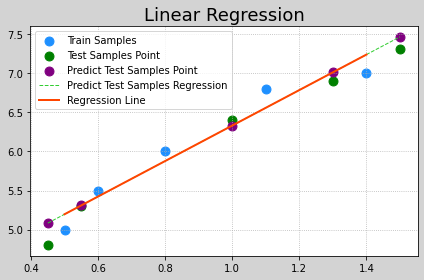

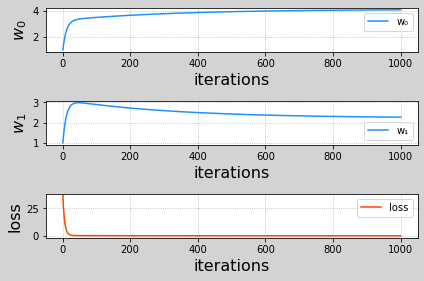

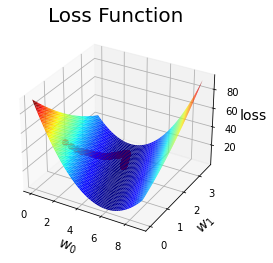

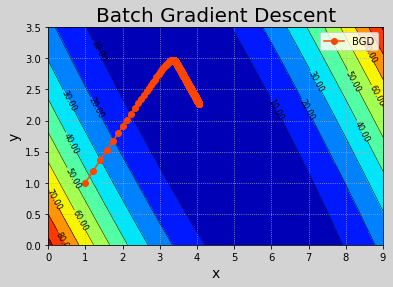

In [54]:
"""
    线性回归(概念及手动实现)
        输入		 输出
        0.5      5.0
        0.6      5.5
        0.8      6.0
        1.1      6.8
        1.4      7.0
        ...
        y = f(x)
        - 预测函数：y = w₀+w₁x
            x: 输入
            y: 输出
            w₀和w₁: 模型参数
        - 所谓模型训练，就是根据已知的x和y，找到最佳的模型参数w₀和w₁，尽可能精确地描述出输入和输出的关系
            5.0 = w₀+ w₁ * 0.5
            5.5 = w₀+ w₁ * 0.6
        - 单样本误差：
            根据预测函数求出输入为x时的预测值：y' = w₀+ w₁x，单样本误差为1/2(y' - y)²。
        - 总样本误差：
            把所有单样本误差相加即是总样本误差：1/2*∑(y' - y)²
        - 损失函数：
            loss = 1/2*∑(w₀+ w₁x - y)²
            - 所以损失函数就是总样本误差关于模型参数的函数，该函数属于三维数学模型，即需要找到一组w₀、w₁使得loss取极小值。

"""
from sklearn import linear_model as lm
#案例：画图模拟梯度下降的过程
#1. 整理训练集数据，自定义梯度下降算法规则，求出w₀, w₁，绘制回归线。
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as axes3d

# from matplotlib import rc
# rc("font",family='Microsoft YaHei')

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
test_x = np.array([0.45, 0.55, 1.0, 1.3, 1.5])
test_y = np.array([4.8, 5.3, 6.4, 6.9, 7.3])
#设置w₀,w₁初始值
w0, w1 = [1], [1]  #使用列表是为了绘制变化曲线，在该图中，三维曲面图中x轴为w₀, y轴为w₁
#迭代次数(需要自己调参，根据loss判断,如果loss在最后两次迭代中相差足够小，即可)
times = 1000
#学习率(需要自己调参)
lrate = 0.01
#损失函数列表(绘制变化曲线使用)
losses = []
#迭代次数列表(绘制变化曲线使用)
epoches = []
for i in range(1, times + 1):
    epoches.append(i)
    #求损失函数关于w₀与w₁的偏导数,从而更新模型参数  损失函数公式：1/2*∑(w₀+ w₁x - y)²
    #损失函数对w₀求偏导数 d₀ = ∑(w₀+ w₁x - y)
    d0 = (w0[-1] + w1[-1] * train_x - train_y).sum()
    #损失函数对w₁求偏导数 d₁ = ∑[x(w₀+ w₁x - y)]
    d1 = (train_x * (w0[-1] + w1[-1] * train_x - train_y)).sum()
    #根据梯度下降公式,更新w₀,w₁模型参数(lrate * 偏导 :每次梯度下降的距离)
    w0_distance = w0[-1] - lrate * d0
    w1_distance = w1[-1] - lrate * d1
    w0.append(w0_distance)
    w1.append(w1_distance)
    loss = ((w0[-1] + w1[-1] * train_x - train_y) ** 2).sum() / 2
    losses.append(loss)
    # print("迭代次数:{0:4} w₀:{1:.8f} w₁:{2:.8f} loss:{3:.8f}".format(i,w0_distance,w1_distance,loss))

# print(len(epoches),len(w0),len(w1),len(losses))

#求出最佳的模型参数w₀,w₁
# print("最佳的模型参数w₀:{},w₁:{}".format(w0,w1))


#根据训练好的w₀和w₁，预测test测试数组，并获得测试数组y的值
pre_test_y = w0[-1] + w1[-1] * test_x
plt.figure("Linear Regression", facecolor="lightgray")
plt.title("Linear Regression", fontdict={"fontsize": 18})
plt.grid(linestyle=":")
#画散点图
plt.scatter(train_x, train_y, s=80, marker="o", color="dodgerblue", label="Train Samples")
plt.scatter(test_x, test_y, s=80, marker="o", color="green", label="Test Samples Point")
plt.scatter(test_x, pre_test_y, s=80, marker="o", color="purple", label="Predict Test Samples Point")
plt.plot(test_x, pre_test_y, '--', c='limegreen', label='Predict Test Samples Regression', linewidth=1)

#通过最佳的模型参数w₀,w₁,绘制回归线
linex = np.linspace(train_x.min(), train_x.max(), 100)
liney = w0[-1] + w1[-1] * linex  # y = w₀+w₁x

plt.plot(linex, liney, color="orangered", linewidth=2, label="Regression Line")
plt.legend()
plt.tight_layout()
#绘制w₀,w₁,loss的变化曲线
plt.figure("Training Progress", facecolor="lightgray")
plt.subplot(311)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("$w_0$", fontdict={"fontsize": 16})
plt.plot(epoches, w0[:-1], color="dodgerblue", label="w₀")

plt.legend()
plt.tight_layout()

plt.subplot(312)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("$w_1$", fontdict={"fontsize": 16})
plt.plot(epoches, w1[:-1], color="dodgerblue", label="w₁")

plt.legend()
plt.tight_layout()

plt.subplot(313)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("loss", fontdict={"fontsize": 16})
plt.plot(epoches, losses, color="orangered", label="loss")

plt.legend()
plt.tight_layout()

# 三维梯度下降图(训练过程图)
number = 500
grid_w0, grid_w1 = np.meshgrid(np.linspace(0, 9, number), np.linspace(0, 3.5, number))
grid_loss = np.zeros_like(grid_w0)

for x, y in zip(train_x, train_y):
    grid_loss += ((grid_w0 + x * grid_w1 - y) ** 2) / 2

plt.figure("Loss Function")
ax = plt.axes(projection="3d")
plt.title("Loss Function", fontdict={"fontsize": 20})
ax.set_xlabel("$w_0$", fontdict={"fontsize": 14})
ax.set_ylabel("$w_1$", fontdict={"fontsize": 14})
ax.set_zlabel("loss", fontdict={"fontsize": 14})
#绘制三维曲面图(指定w₀,w₁的范围，计算loss值)
ax.plot_surface(grid_w0, grid_w1, grid_loss, rstride=10, cstride=10, cmap="jet")
#绘制梯度下降曲线
ax.plot(w0[:-1], w1[:-1], losses, 'o-', c='red', label='BGD')

#绘制等高线图
plt.figure('Batch Gradient Descent', facecolor='lightgray')
plt.title('Batch Gradient Descent', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=":")
#绘制等高线图(指定w₀,w₁的范围，计算loss值)
cutr = plt.contour(grid_w0, grid_w1, grid_loss, 10, colors="black", linewidths=0.5)
#绘制梯度下降曲线
plt.clabel(cutr, inline_spacing=0.1, fmt="%.2f", fontsize=8)
plt.contourf(grid_w0, grid_w1, grid_loss, 10, cmap="jet")
plt.plot(w0, w1, 'o-', c='orangered', label='BGD')
plt.legend()
plt.show()

In [ ]:
"""
    线性回归(sklearn实现)
         - 操作步骤
            - 采集数据(读文本)
            - 整理输入集(二维)与输出集(一维)
            - 构建线性回归模型,训练模型
            - 针对训练数据,得到预测结果,画图

        - 线性回归sklearn相关API：
            import sklearn.linear_model as lm
            - 创建模型
                - model = lm.LinearRegression()
                - model.fit(input, output)      通过梯度下降法计算模型参数(训练模型)
                    - input             输入为一个二维数组表示的样本矩阵
                    - output            输出为每个样本最终的结果(一维数组)
                - model.predict(array)          预测输出
                    - array             二维数组，每一行是一个样本，每一列是一个特征。

        - 评估训练结果误差（metrics）
            - 线性回归模型训练完毕后，可以利用测试集评估训练结果误差。sklearn.metrics提供了计算模型误差的几个常用算法：
                - import sklearn.metrics as sm
                    - sm.mean_absolute_error(y, predict_y)   平均绝对值误差：1/m∑|实际输出-预测输出|
                        - y                     实际值
                        - predict_y             预测值
                    - sm.mean_squared_error(y, predict_y)    平均平方误差：SQRT(1/mΣ(实际输出-预测输出)^2)
                        - y                     实际值
                        - predict_y             预测值
                    - sm.median_absolute_error(y, pred_y)    中位绝对值误差：MEDIAN(|实际输出-预测输出|)
                        - y                     实际值
                        - predict_y             预测值
                    - sm.r2_score(y, pred_y)                 R2得分，(0,1]区间的分值。分数越高，误差越小。
                        - y                     实际值
                        - predict_y             预测值

        - 模型的保存和加载
            - 模型训练是一个耗时的过程，一个优秀的机器学习是非常宝贵的。可以模型保存到磁盘中，也可以在需要使用的时候从磁盘中重新加载模型即可。
              不需要重新训练。
                import pickle
                - pickle.dump(内存对象, 磁盘文件)   保存模型
                - model = pickle.load(磁盘文件)    加载模型

        - 岭回归
            - 普通线性回归模型使用基于梯度下降的最小二乘法，在最小化损失函数的前提下，寻找最优模型参数，于此过程中，包括少数异常样本在内的全
              部训练数据都会对最终模型参数造成程度相等的影响，异常值对模型所带来影响无法在训练过程中被识别出来。为此，岭回归在模型迭代过程所
              依据的损失函数中增加了正则项，以限制模型参数对异常样本的匹配程度，进而提高模型面对多数正常样本的拟合精度。
            import sklearn.linear_model as lm
                - model = lm.Ridge(alpha，fit_intercept, max_iter)
                    - alpha                     正则强度(默认1.0)
                    - fit_intercept             是否训练截距
                    - max_iter                  最大迭代次数
                - model.fit(input, output)      训练模型
                    - input             输入为一个二维数组表示的样本矩阵
                    - output            输出为每个样本最终的结果(一维数组)
                - model.predict(array)          预测输出
                    - array             二维数组，每一行是一个样本，每一列是一个特征。


"""
import sklearn.linear_model as lm
import numpy as np
from matplotlib import pyplot as plt

#采集数据
x, y = np.loadtxt("./ml_data/single.txt", delimiter=",", unpack=True, usecols=(0, 1))
#将维度转为二维数据(其中每列为特征数据:sklearn规定)
x = x.reshape(-1, 1)  #n行1列的二维数组(唯一特征列)

#创建线性模型对象
model = lm.LinearRegression()
#训练模型
model.fit(x, y)
#根据输入预测输出
predict_y = model.predict(x)
# print(predict_y)
plt.figure('Linear Regression', facecolor="lightgray")
plt.title('Linear Regression', fontsize=20)
plt.xlabel("x", fontdict={"fontsize": 14})
plt.ylabel("y", fontdict={"fontsize": 14})
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.scatter(x, y, c='dodgerblue', alpha=0.75, s=60, label='Sample')
plt.plot(x, predict_y, c='orangered', label='Regression')
plt.legend()
plt.show()

print("*" * 50)
import sklearn.metrics as sm

'''评估训练结果误差（metrics）'''
# 平均绝对值误差：1/m∑|实际输出-预测输出|
print("平均绝对值误差: {}".format(sm.mean_absolute_error(y, predict_y)))
# 平均平方误差：SQRT(1/mΣ(实际输出-预测输出)^2)
print("平均平方误差: {}".format(sm.mean_squared_error(y, predict_y)))
# 中位绝对值误差：MEDIAN(|实际输出-预测输出|)
print("中位绝对值误差: {}".format(sm.median_absolute_error(y, predict_y)))
# R2得分，(0,1]区间的分值。分数越高，误差越小。
print("R2得分: {}".format(sm.r2_score(y, predict_y)))

print("*" * 50)
'''模型的保存和加载'''
import pickle

with open("sklearn_data/linear.pkl", "wb") as f:
    #保存模型对象
    pickle.dump(model, f)

with open("sklearn_data/linear.pkl", "rb") as f:
    #加载模型对象
    model = pickle.load(f)
    predict_y = model.predict(x)
    print(predict_y)

print("*" * 50)
#岭回归(特殊的线性回归,弱化异常值对整体样本的影响,使拟合直线更加匹配正常样本)

x, y = np.loadtxt("./ml_data/abnormal.txt", delimiter=",", unpack=True, usecols=(0, 1))
x = x.reshape(-1, 1)
#使用线性回归
model = lm.LinearRegression()

model.fit(x, y)
predict_y1 = model.predict(x)
#使用岭回归
model = lm.Ridge(210, fit_intercept=True, max_iter=10000)  #若alpha为0，则为线性回归
model.fit(x, y)
predict_y2 = model.predict(x)

plt.figure("Linear Regression & Ridge Regression", facecolor="lightgray")
plt.title("Linear Regression & Ridge Regression", fontdict={"fontsize": 20})
plt.grid(linestyle=":")
plt.xlabel("x")
plt.ylabel("y")
#绘制原始样本点分布
plt.scatter(x, y, s=30, c="dodgerblue", marker="o", label="Simple Point")
plt.plot(x, predict_y1, c="orangered", label="Linear Regression Line")
plt.plot(x, predict_y2, c="purple", label="Ridge Regression Line")
#绘制异常点指向
plt.annotate("Abnormal Point", xycoords="data", xy=(5, 11), textcoords="offset points",
             xytext=(20, -50), fontsize=14, arrowprops=dict(
        arrowstyle="->",
        connectionstyle="angle3")
             )

plt.legend()
plt.show()
#计算线性回归及岭回归的得分(得分的高低根据测试样本来定，而不是下面的训练样本)
#在正常样本中(不含异常值)，岭回归得分会比线性回归得分高
print("线性回归R2得分: {} 岭回归R2得分: {}".format(sm.r2_score(y, predict_y1), sm.r2_score(y, predict_y2)))



In [ ]:
"""
    多项式回归(基于模型的算法)
        - 若希望回归模型更好的拟合训练样本数据，可以使用多项式回归器。
            - 一元多项式回归
                y = w₀ + w₁x + w₂x² + w₃x³ + ... + wₙxⁿ
                将高次项看做对一次项特征的扩展得到：
                y = w₀ + w₁x₁ + w₂x₂ + w₃x₃ + ... + wₙxₙ
                那么一元多项式回归即可以看做为多元线性回归，可以使用LinearRegression模型对样本数据进行模型训练。
            - 一元多项式回归的实现需要两个步骤：
                1. 将一元多项式回归问题转换为多元线性回归问题（只需给出多项式最高次数即可）。
                2. 将1步骤得到多项式的结果中 w₁   w₂ .. 当做样本特征，交给线性回归器训练多元线性模型。
            - 使用sklearn提供的数据管线实现两个步骤的顺序执行：
                import sklearn.pipeline as pl
                import sklearn.preprocessing as sp
                import sklearn.linear_model as lm
                - model = pl.make_pipeline(sp.PolynomialFeatures(10),lm.LinearRegression())
                    - sp.PolynomialFeatures(degree)           多项式特征扩展器(一元多项式回归方程转化为多元线性回归方程)
                        - degree                                    最高次数
                    - lm.LinearRegression()                   线性回归器

            - 欠拟合
                - 过于简单的模型，无论对于训练数据还是测试数据都无法给出足够高的预测精度，这种现象叫做欠拟合。
            - 过拟合
                - 过于复杂的模型，对于训练数据可以得到较高的预测精度，但对于测试数据通常精度较低，这种现象叫做过拟合。
            - 一个性能可以接受的学习模型应该对训练数据和测试数据都有接近的预测精度，而且精度不能太低。
                           训练集R2   测试集R2
                            0.3        0.4        欠拟合：过于简单，无法反映数据的规则
                            0.9        0.2        过拟合：过于复杂，太特殊，缺乏一般性
                            0.7        0.6        可接受：复杂度适中，既反映数据的规则，同时又不失一般性
"""
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm
import numpy as np
from matplotlib import pyplot as plt

#案例：
#采集数据
x, y = np.loadtxt("./ml_data/single.txt", delimiter=",", unpack=True, usecols=(0, 1))
x = x.reshape(-1, 1)
model = pl.make_pipeline(sp.PolynomialFeatures(10),  # 多项式特征扩展器
                         lm.LinearRegression())  # 线性回归器

model.fit(x, y)
pre_y = model.predict(x)
#绘制多项式函数图像，从min到max拆500个点
#预测500个函数值，按顺序连线。
test_x = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
pre_test_y = model.predict(test_x)
#画图
plt.figure("Polynomial Regression", facecolor="lightgray")
plt.title("Polynomial Regression", fontdict={"fontsize": 20})
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle=":")
plt.scatter(x, y, c="dodgerblue", marker="o", s=50, label="Sample Point")

plt.plot(x, pre_y, color="purple", alpha=0.3, label="Train1 Polynomial Regression Line")
#Train1 Polynomial Regression Line曲线比较混乱,故采用本图代替
plt.plot(test_x, pre_test_y, color="orangered", alpha=0.7, label="Train2 Polynomial Regression Line")
plt.legend()
plt.show()

print("R2得分: {}".format(sm.r2_score(y, pre_y)))


决策树(基于实例的算法)：图在sklearn_data文件中
        - 基本算法原理
            - 核心思想：相似的输入必会产生相似的输出。例如预测某人薪资：
                年龄：1-青年，2-中年，3-老年
                学历：1-本科，2-硕士，3-博士
                经历：1-出道，2-一般，3-老手，4-骨灰
                性别：1-男性，2-女性

                年龄    学历    经历    性别    ==>    薪资
                 1       1      1      1     ==>    6000（低）
                 2       1      3      1     ==>    10000（中）
                 3       3      4      1     ==>    50000（高）
                ...     ...    ...    ...    ==>     ...
                 1       3      2      2     ==>      ?
                为了提高搜索效率，使用树形数据结构处理样本数据：
                             |⁻ 学历1              |⁻ 学历1                  |⁻ 学历1
                    年龄 = 1 <   学历2    年龄 = 2 <   学历2        年龄 = 3 <   学历2
                             |₋ 学历3              |₋ 学历3                  |₋ 学历3
                首先从训练样本矩阵中选择第一个特征进行子表划分，使每个子表中该特征的值全部相同，然后再在每个子表中选择下一个特征按照同样
                的规则继续划分更小的子表，不断重复直到所有的特征全部使用完为止，此时便得到叶级子表，其中所有样本的特征值全部相同。
                对于待预测样本，根据其每一个特征的值，选择对应的子表，逐一匹配，直到找到与之完全匹配的叶级子表，用该子表中样本的输出，
                通过平均(回归)或者投票(分类)为待预测样本提供输出。
                随着子表的划分，信息熵（信息的混乱程度）越来越小，信息越来越纯，数据越来越有序。
            - 决策树回归器模型相关API：
                import sklearn.tree as st
                - 创建决策树回归器模型  决策树的最大深度为4
                    - model = st.DecisionTreeRegressor(max_depth=4)
                -训练模型
                    - model.fit(train_x, train_y)
                        - train_x           二维数组样本数据
                        - train_y           训练集中对应每行样本的结果
                - 测试模型
                        - pred_test_y = model.predict(test_x)
        - 工程优化
            - 不必用尽所有的特征，叶级子表中允许混杂不同的特征值，以此降低决策树的层数，在精度牺牲可接受的前提下，提高模型的性能。通常情况下，
              可以优先选择使 *信息熵 减少量最大的特征作为划分子表的依据。
        - 集合算法
            - 根据多个不同模型给出的预测结果，利用平均(回归)或者投票(分类)的方法，得出最终预测结果。
                - 基于决策树的集合算法，就是按照某种规则，构建多棵彼此不同的决策树模型，分别给出针对未知样本的预测结果，最后通过平均或投票得
                  到相对综合的结论。
            - 正向激励
                - 首先为样本矩阵中的样本随机分配初始权重，由此构建一棵带有权重的决策树，在由该决策树提供预测输出时，通过加权平均或者加权投票的方
                  式产生预测值。将训练样本代入模型，预测其输出，对那些预测值与实际值不同的样本，提高其权重，由此形成第二棵决策树。重复以上过程，
                  构建出不同权重的若干棵决策树。
                - 正向激励相关API：
                    import sklearn.tree as st
                    import sklearn.ensemble as se
                    - model = st.DecisionTreeRegressor(max_depth=4)
                        - max_depth                      最大深度
                    - model = se.AdaBoostRegressor(model, n_estimators=400, random_state=7)    自适应增强决策树回归模型
                        - model                          决策树模型（一颗）
                        - n_estimators                   构建400棵不同权重的决策树，训练模型
                        - random_state                   随机种子(增强迭代使用)
                    - model.fit(train_x, train_y)           训练模型
                    - pred_test_y = model.predict(test_x)   预测模型
                - 特征重要性
                    - 作为决策树模型训练过程的副产品，根据每个特征划分子表前后的信息熵减少量就标志了该特征的重要程度，此即为该特征重要性指标。
                      训练得到的模型对象提供了属性：feature_importances_来存储每个特征的重要性。
                    - 样本矩阵特征重要性属性
                        - model.fit(train_x, train_y)
                        - fi = model.feature_importances_
            - 自助聚合
                - 每次从总样本矩阵中以有放回抽样的方式随机抽取部分样本构建决策树，这样形成多棵包含不同训练样本的决策树，以削弱某些强势样本对
                  模型预测结果的影响，提高模型的泛化特性。
            - 随机森林（属于集合算法的一种）
                - 在自助聚合的基础上，每次构建决策树模型时，不仅随机选择部分样本，而且还随机选择部分特征，这样的集合算法，不仅规避了强势样本
                  对预测结果的影响，而且也削弱了强势特征的影响，使模型的预测能力更加泛化。
                - 随机森林相关API：
                    import sklearn.ensemble as se
                    - model = se.RandomForestRegressor(max_depth,n_estimators,min_samples_split)     随机森林回归模型
                        - max_depth                         决策树最大深度10
                        - n_estimators                      构建1000棵决策树，训练模型
                        - min_samples_split                 子表中最小样本数 若小于这个数字，则不再继续向下拆分


D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

单颗决策树特征重要性: [4.57077951e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.09641449e-02 6.00678261e-01 2.37437054e-04 1.02226572e-01
 0.00000000e+00 1.46953459e-02 5.89800635e-03 5.07712844e-03
 1.94515309e-01]
R2得分: 0.8407507213504029
中位绝对值误差: 2.489194027364845
**********************************************************************
正向激励特征重要性: [0.04491695 0.00220908 0.0066507  0.00085861 0.03771593 0.24378202
 0.02194103 0.09281199 0.01087576 0.03005529 0.03684218 0.01875293
 0.45258751]
R2得分: 0.9197900133135688
中位绝对值误差: 1.974125921880503


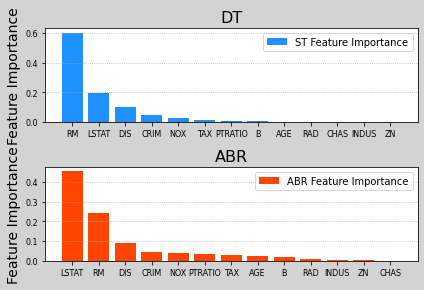

In [98]:
"""
    决策树与正向激励(sklearn实现波士顿房价预测)
"""
# 案例：预测波士顿地区房屋价格。
import sklearn.datasets as sd
# 打乱数据集用
import sklearn.utils as su
import sklearn.ensemble as se
from matplotlib import pyplot as plt

# 获得波士顿地区房屋价格的第一种方式，注意：load_boston()函数在1.2版本中已经被分离
boston = sd.load_boston()

# 获得波士顿地区房屋价格的第二种方式
# import pandas as pd
# import numpy as np
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

# print(boston.data)   # 输入数据
# print(boston.target) # 输出数据
# print(boston.feature_names) # 输入数据的特征名称

# 打乱原始数据集的输入和输出
# random_state : 随机种子
# 使用相同的随机种子多次打乱得到的结果是一致的
x, y = su.shuffle(boston.data, boston.target, random_state=7)
# 划分训练集和测试集
train_size = int(len(x) * 0.8)  #从总样本中挑出80%用作训练集，剩下20%用作测试集
train_x, train_y, test_x, test_y = x[:train_size], y[:train_size], x[train_size:], y[train_size:]

# 构建决策树模型
import sklearn.tree as st
import sklearn.metrics as sm

# 创建决策树回归模型
model = st.DecisionTreeRegressor(max_depth=6)
#训练模型
model.fit(train_x, train_y)
st_fi = model.feature_importances_
print("单颗决策树特征重要性: {}".format(st_fi))
#拿到影响最大的特征标签
# index = np.argmax(fi)
# print("单颗决策树影响最大的特征为： {}".format(boston.feature_names[index]))


#预测模型
pred_test_y = model.predict(test_x)
print("R2得分: {}".format(sm.r2_score(test_y, pred_test_y)))
print("中位绝对值误差: {}".format(sm.mean_absolute_error(test_y, pred_test_y)))
print("*" * 70)

'''集合算法'''
#自适应增强(正向激励)决策树回归模型  n_estimators:参数需要自己调
model = se.AdaBoostRegressor(model, n_estimators=200, random_state=7)
model.fit(train_x, train_y)

#拿到特征的重要性
abr_fi = model.feature_importances_
print("正向激励特征重要性: {}".format(abr_fi))
#拿到影响最大的特征标签
# index = np.argmax(fi)
# print("正向激励决策树影响最大的特征为： {}".format(boston.feature_names[index]))

#预测模型
pred_test_y = model.predict(test_x)
print("R2得分: {}".format(sm.r2_score(test_y, pred_test_y)))
print("中位绝对值误差: {}".format(sm.mean_absolute_error(test_y, pred_test_y)))

plt.figure("Feature Importance", facecolor="lightgray")
plt.subplot(211)
plt.title("DT", fontsize=16)
plt.tick_params(labelsize=8)
plt.ylabel("Feature Importance", fontsize=14)
plt.grid(linestyle=":", axis="y")
#对特征重要性排序
sorted_index = st_fi.argsort()[::-1]
st_fi = st_fi[sorted_index]

names = boston.feature_names
names = names[sorted_index]

plt.bar(names, st_fi, color="dodgerblue", label="ST Feature Importance")
plt.legend()
plt.tight_layout()
plt.subplot(212)
plt.title("ABR", fontsize=16)
plt.tick_params(labelsize=8)
plt.ylabel("Feature Importance", fontsize=14)
plt.grid(linestyle=":", axis="y")
#对特征重要性排序
sorted_index = abr_fi.argsort()[::-1]
abr_fi = abr_fi[sorted_index]
names = boston.feature_names
names = names[sorted_index]

plt.bar(names, abr_fi, color="orangered", label="ABR Feature Importance")
plt.legend()
plt.tight_layout()
plt.show()




2
手写数据集预测:   {'no surfacing': {0: 'no', 1: {'flippers': {'0': 'no', '1': 'yes'}}}}


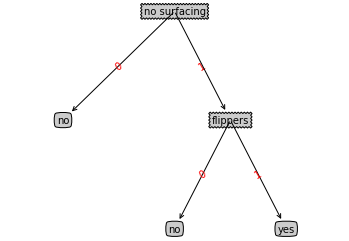

**********************************************************************
眼睛预测:   {'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'no': {'age': {'young': 'soft', 'pre': 'soft', 'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}}}, 'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'young': 'hard', 'pre': 'no lenses', 'presbyopic': 'no lenses'}}}}}}}}


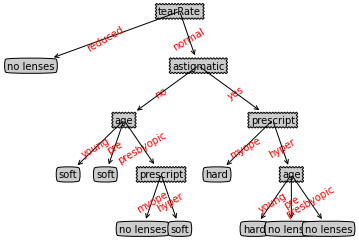

In [16]:
"""
    决策树(手撕代码:ID3算法实现)
        - 决策树采用的是信息熵或者Gini系数来作为分类标准(手动计算时使用)
            - 信息熵：是度量样本集合纯度的常用指标，该值越大，表示该集合纯度越低(混乱度越大)；该值越小，表示该集合纯度越高(混乱度越低)
                                        |y|
                - 信息熵公式 Ent(D) =  -   ∑  Pₖlog₂Pₖ
                                        k=1
                    - D                         总样本空间
                    - Pₖ                        子样本空间占总样本空间比值
                    - y                         结果集
            - Gini系数（CART算法使用） 反映了从数据集中随机选择两个样本，类别不一致的概率。因此，基尼系数越小，数据集的纯度越高。CART决策树
                    (Classification And Regression Tree)使用基尼系数进行划分属性选择。
                - Gini系数公式
                                |y|                  |y|
                    - Gini(p) =  ∑   Pₖ(1 - Pₖ) = 1 -  ∑ Pₖ²
                                K=1                  K=1
                            - y                      结果集
                    - 数据集下根据属性a划分的基尼系数
                                           v    Dᘁ
                        Gini_index(D,a) =  ∑   ———— Gini(Dᘁ)
                                          v=1   D
            - 信息增益（ID3算法使用）  决策树根据属性进行判断，将具有相同属性的样本划分到相同的节点下面，此时，样本较划分之前具有更高的纯度，信息熵值有所下
                       降。此时，使用划分前的信息熵减去划分后的信息熵就可以得到决策树在划分前后获得的信息增益。
                                        v   Dᘁ
                - Gain(D,a) = Ent(D) -  ∑  ————  Ent(Dᘁ)
                                       v=1  D
                    - D                                 样本集合
                    - a                                 特征
                    - v                                 表示特征a可能的取值种类
                    - Dᵛ/D                              表示经过特征a划分之后每一个类别的权重。
                    - Ent(D)                            信息熵
                    - Ent(Dᵛ)                           子样本信息熵

            - 增益率（C4.5算法使用） 增益率不直接使用信息增益，而是使用信息增益与信息熵的比值作为衡量特征优劣的标准，C4.5算法就是使用增益率作为标准选择最优
                     划分属性。
                                        Gain(D,a)
                    - Gainᵣatio(D,a) =   ————————
                                          IV(a)
                                        v   Dᘁ          Dᘁ
                        - IV(a) =    -  ∑  ————  log₂  ————                 信息熵
                                       v=1  D           D
                            - Dᘁ/D                              表示经过特征a划分之后每一个类别的权重。

"""
import sklearn.datasets as sd
# 打乱数据集用
import sklearn.utils as su
import sklearn.ensemble as se
import numpy as np


#计算信息熵
def calcInfoEntropy(dataSet):
    dataSet_length = len(dataSet)
    sub_sample_set = {}
    '''
                            |y|
      信息熵公式 Ent(D) =  -   ∑  Pₖlog₂Pₖ
                            k=1
    '''
    # 通过结果集划分子样本空间
    for row in dataSet:
        if row[-1] not in sub_sample_set:
            sub_sample_set[row[-1]] = 0
        sub_sample_set[row[-1]] += 1
    # print(sub_sample_set)
    #计算信息熵
    infoEntropy = 0.0
    for sub_sample in sub_sample_set:
        # 计算 Pₖ
        pk = sub_sample_set[sub_sample] / float(dataSet_length)
        # 计算香浓熵

        infoEntropy += pk * np.log2(pk)
    #返回计算好的信息熵
    return -infoEntropy


# 划分数据集
def split_dataSet(dataSet, column_index, unique_value):
    # print(dataSet,column_index,unique_value)
    new_dataSet = []
    for row in dataSet:
        if row[column_index] == unique_value:
            sub_dataSet = list(row[:column_index])
            sub_dataSet.extend(row[column_index + 1:])
            new_dataSet.append(sub_dataSet)
    return np.array(new_dataSet)


#选择最优特征
def choose_best_feature_to_split(dataSet):
    #计算未切割数据集信息熵
    infoEntropy = calcInfoEntropy(dataSet)
    #计算信息增益
    '''
                                    v   Dᘁ
            - Gain(D,a) = Ent(D) -  ∑  ————  Ent(Dᘁ)    信息增益越大,信息纯度越小(寻找纯度小的进行划分)
                                   v=1  D

    '''
    bestInfoGain = 0.0
    bestFeatureIndex = -1
    #单个样本长度(不包括最后一列结果集数据)

    trainset_row_length = len(dataSet[0]) - 1

    for column_index in range(trainset_row_length):
        # 获取样本集中特征列数据
        column_value = [row[column_index] for row in dataSet]
        # 获得特征列唯一值集合
        sub_sample_set = set(column_value)

        newInfoGain = 0.0
        '''
                   v   Dᘁ
           -  计算  ∑  ————  Ent(Dᘁ)
                  v=1  D
        '''
        for unique_value in sub_sample_set:
            subDataSet = split_dataSet(dataSet, column_index, unique_value)  #子表构成的数据集
            # print(newDataSet)
            #计算信息增益
            # Ent(Dᵛ)
            Entdv = calcInfoEntropy(subDataSet)  #子表信息熵

            newInfoGain += len(subDataSet) / float(len(dataSet)) * Entdv

        #获得信息熵
        infoGain = infoEntropy - newInfoGain
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeatureIndex = column_index

    return bestFeatureIndex


import operator


def majorityCnt(classList):
    class_count = {}
    for vote in classList:
        if vote not in class_count:
            class_count[vote] = 0
        class_count[vote] += 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count[0][0]


#创建决策树
'''
    dataSet: 数据集
        labels: 特征名称
        target_names_dict: 结果列数值与英文对照
        feature_columns_labels: 特征列数值与英文对照
'''


def create_decision_tree(dataSet, labels, target_names_dict=None, feature_columns_labels=None):
    #获取最后一列类别标签
    class_list = [row[-1] for row in dataSet]
    if target_names_dict:

        try:
            class_list = list(map(int, class_list))
            class_list = [target_names_dict[n] for n in class_list]
            # print(class_list,1032)

        except Exception as e:
            pass
    else:
        pass
    # 用自定义数据集则需注释掉本行代码
    # class_list = [target_names_dict[n] for n in class_list]

    # 类别完全相同则停止划分
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    # 遍历完所有特征时返回出现次数最多的分类信息
    if len(dataSet[0]) == 1:
        return majorityCnt(class_list)
    bestFeatureIndex = choose_best_feature_to_split(dataSet)
    # 拿到要切分的最优特征列名称
    bestFeatureLabel = labels[bestFeatureIndex]
    myTree = {bestFeatureLabel: {}}

    # print(dataSet,type(dataSet),labels,type(labels))

    # 删除最优特征列标签
    del (labels[bestFeatureIndex])
    # 得到列表包含的所有特征值
    feature_cloumn_value = [row[bestFeatureIndex] for row in dataSet]
    sub_sample_set = set(feature_cloumn_value)
    for unique_value in sub_sample_set:
        # 删除最优特征列标签后剩下的标签
        subLabels = labels[:]
        number = None
        try:
            number = create_decision_tree(split_dataSet(dataSet, bestFeatureIndex, unique_value)
                                          , subLabels, target_names_dict, feature_columns_labels)

            # class_list = list(map(int,class_list))
            # class_list = [target_names_dict[n] for n in class_list]
        except:
            pass

        if feature_columns_labels:
            myTree[bestFeatureLabel][feature_columns_labels[bestFeatureLabel][unique_value]] = number
        else:
            myTree[bestFeatureLabel][unique_value] = number
    return myTree


#绘制树形图
import matplotlib.pyplot as plt

decision_node = dict(boxstyle="sawtooth", fc="0.8")
leaf_node = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


#获取树的叶子结点个数（确定图的宽度）
def get_leaf_num(tree):
    leaf_num = 0
    first_key = list(tree.keys())[0]
    next_dict = tree[first_key]
    for key in next_dict.keys():
        if type(next_dict[key]).__name__ == "dict":
            leaf_num += get_leaf_num(next_dict[key])
        else:
            leaf_num += 1
    return leaf_num


#获取数的深度（确定图的高度）
def get_tree_depth(tree):
    depth = 0
    first_key = list(tree.keys())[0]
    next_dict = tree[first_key]
    for key in next_dict.keys():
        if type(next_dict[key]).__name__ == "dict":
            thisdepth = 1 + get_tree_depth(next_dict[key])
        else:
            thisdepth = 1
        if thisdepth > depth: depth = thisdepth
    return depth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def retruieveTree(i):
    listOfTrees = [
        {"no surfacing": {0: "no", 1: {"flippers": {0: "no", 1: "yes"}}}},
        {"no surfacing": {0: "no", 1: {"flippers": {0: {"head": {0: 'no', 1: "yes"}}, 1: "no"}}}}
    ]
    return listOfTrees[i]


#在父子节点间填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    # createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center",color ="red", rotation=30)
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", color="red", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = get_leaf_num(myTree)
    depth = get_tree_depth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decision_node)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leaf_node)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD


def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(get_leaf_num(inTree))
    plotTree.totalD = float(get_tree_depth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


#创建决策树分类器
def classify(inputTree, featureLabels: "特征标签", testVec):
    firstStr = list(inputTree.keys())[0]

    secondDict = inputTree[firstStr]

    featureIndex = featureLabels.index(firstStr)  #将标签转化为索引
    # print(secondDict)
    classLabel = []
    for key in secondDict.keys():
        if testVec[featureIndex] == key:
            if type(secondDict[key]).__name__ == "dict":
                classLabel = classify(secondDict[key], featureLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel


'''
    train_dataSet :训练集
    result_target_names:结果列分类名称
'''


def result_set_comprison(train_dataSet, result_target_names):
    target_names_dict = {}
    min_value = np.min(train_dataSet[:, -1])
    for index, label in enumerate(result_target_names):
        target_names_dict[float(index) + min_value] = label
    return target_names_dict


#手写的数据集 机器学习实战 P36 - P41
dataSet = [
    [1, 1, 'yes'],
    [1, 1, 'yes'],
    [1, 0, 'no'],
    [0, 1, 'no'],
    [0, 1, 'no']
]
train_dataSet = np.array(dataSet)

target_names_dict = {"yes": "no surfacing", "no": "flippers"}
labels = ['no surfacing', 'flippers']

mytree = create_decision_tree(dataSet, labels)
print("手写数据集预测:  ", mytree)
createPlot(mytree)

print("*" * 70)

# 预测隐形眼镜  机器学习实战 P50 - P52

#结果列标签
result_target_names = ["hard", "soft", "no lenses"]

#特征列分类信息
feature_columns_labels = {"tearRate": {1: "reduced", 2: "normal"}, "astigmatic": {1: "no", 2: "yes"},
                          "prescript": {1: "myope", 2: "hyper"}, "age": {1: "young", 2: "pre", 3: "presbyopic"}
                          }

with open("sklearn_data/lenses.data") as f:
    lenses = [inst.strip("\n").split("  ") for inst in f.readlines()]
    lenses = np.array(lenses, dtype="int32")

    #特征列标签
    lensesLabels = ["age", "prescript", "astigmatic", "tearRate"]

    target_names_dict = result_set_comprison(lenses, result_target_names)
    # print(target_names_dict,1208)

    lensesTree = create_decision_tree(lenses, lensesLabels, target_names_dict, feature_columns_labels)
    print("眼睛预测:  ", lensesTree)
    createPlot(lensesTree)


{'4.3': [1, 0, 0], '4.4': [3, 0, 0], '4.5': [1, 0, 0], '4.6': [4, 0, 0], '4.7': [2, 0, 0], '4.8': [5, 0, 0], '4.9': [4, 1, 1], '5.0': [8, 2, 0], '5.1': [8, 1, 0], '5.2': [3, 1, 0], '5.3': [1, 0, 0], '5.4': [5, 1, 0], '5.5': [2, 5, 0], '5.6': [0, 5, 1], '5.7': [2, 5, 1], '5.8': [1, 3, 3], '5.9': [0, 2, 1], '6.0': [0, 4, 2], '6.1': [0, 4, 2], '6.2': [0, 2, 2], '6.3': [0, 3, 6], '6.4': [0, 2, 5], '6.5': [0, 1, 4], '6.6': [0, 2, 0], '6.7': [0, 3, 5], '6.8': [0, 1, 2], '6.9': [0, 1, 3], '7.0': [0, 1, 0], '7.1': [0, 0, 1], '7.2': [0, 0, 3], '7.3': [0, 0, 1], '7.4': [0, 0, 1], '7.6': [0, 0, 1], '7.7': [0, 0, 4], '7.9': [0, 0, 1]} 740
{'2.0': [0, 1, 0], '2.2': [0, 2, 1], '2.3': [1, 3, 0], '2.4': [0, 3, 0], '2.5': [0, 4, 4], '2.6': [0, 3, 2], '2.7': [0, 5, 4], '2.8': [0, 6, 8], '2.9': [1, 7, 2], '3.0': [6, 8, 12], '3.1': [5, 3, 4], '3.2': [5, 3, 5], '3.3': [2, 1, 3], '3.4': [9, 1, 2], '3.5': [6, 0, 0], '3.6': [2, 0, 1], '3.7': [3, 0, 0], '3.8': [4, 0, 2], '3.9': [2, 0, 0], '4.0': [1, 0, 0], '4.

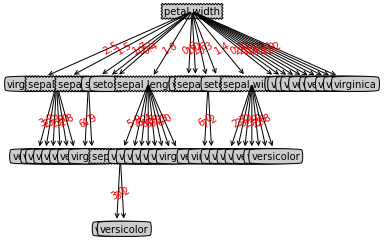

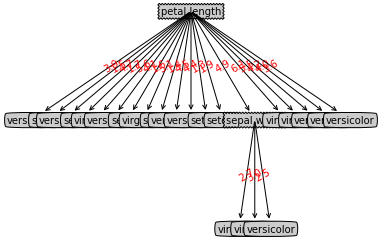

In [92]:
"""
    决策树(手撕代码:CART算法实现)
"""
import sklearn.datasets as sd
# 打乱数据集用
import sklearn.utils as su
import numpy as np


#鸢尾花预测


#计算基尼系数
def calcGiniCoefficient(dataSet):
    sub_sample_set = {}
    dataSet_Length = len(dataSet)

    #划分子样本
    for index in range(dataSet_Length):
        if dataSet[index][-1] not in sub_sample_set:
            sub_sample_set[dataSet[index][-1]] = 0
        sub_sample_set[dataSet[index][-1]] += 1
    # print(sub_sample_set)
    '''
        根据子图在总图的占比计算基尼系数
            - Gini系数公式
                            |y|                 |y|
                - Gini(p) =  ∑  Pₖ(1 - Pₖ) = 1 -  ∑  Pₖ²
                            K=1                 K=1
    '''

    pk2 = 0.0
    for label, count in sub_sample_set.items():
        pk2 += np.power(count / float(dataSet_Length), 2)
    GiniP = 1 - pk2
    return GiniP


def split_dataSet(dataSet, columns_index, unique_value):
    # return np.array(sub_sample_array)
    new_dataSet = []
    for row in dataSet:
        if row[columns_index] == unique_value:
            sub_dataSet = list(row[:columns_index])
            sub_dataSet.extend(row[columns_index + 1:])
            new_dataSet.append(sub_dataSet)

    return np.array(new_dataSet)


def choose_best_feature_to_split(dataSet):
    '''
        - 计算基尼指数
                                 v   |Dᘁ|
            - Gini_index(D,a) =  ∑   ————  Gini(Dᘁ)
                                v=1  |D |
    :param dataSet:
    :return:
    '''
    dataSet_Length = len(dataSet)
    Gain_Index = 100.0

    BestFeatureIndex = -1
    for columns_index in range(len(dataSet[0]) - 1):
        # 拿到每列的数据
        column_value = [row[columns_index] for row in dataSet]
        # 每列数据去重,获取唯一值
        unique_value_set = set(column_value)
        #
        Single_Column_Gain_Index = 0.0
        for unique_value in unique_value_set:
            sub_sample_array = split_dataSet(dataSet, columns_index, unique_value)
            # 计算子样本基尼系数 Gini(Dᵛ)
            subGiniCoefficient = calcGiniCoefficient(sub_sample_array)
            # 计算基尼指数
            Single_Column_Gain_Index += (len(sub_sample_array) / float(dataSet_Length)) * subGiniCoefficient

        #计算单列基尼指数(选择基尼指数最小的属性作为优先划分属性)
        if Gain_Index > Single_Column_Gain_Index:
            Gain_Index = Single_Column_Gain_Index
            BestFeatureIndex = columns_index
    return BestFeatureIndex


def create_decision_tree(dataSet, labels, target_names_dict=None, feature_columns_labels=None):
    #获取最后一列类别标签
    class_list = [row[-1] for row in dataSet]
    if target_names_dict:
        try:
            class_list = list(map(int, class_list))
            class_list = [target_names_dict[n] for n in class_list]
            # print(class_list,1032)
        except Exception as e:
            pass
    else:
        pass
    # 用自定义数据集则需注释掉本行代码
    # class_list = [target_names_dict[n] for n in class_list]

    # 类别完全相同则停止划分
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    # 遍历完所有特征时返回出现次数最多的分类信息
    if len(dataSet[0]) == 1:
        return majorityCnt(class_list)
    bestFeatureIndex = choose_best_feature_to_split(dataSet)

    # 拿到要切分的最优特征列名称
    bestFeatureLabel = labels[bestFeatureIndex]
    myTree = {bestFeatureLabel: {}}

    # print(dataSet,type(dataSet),labels,type(labels))

    # 删除最优特征列标签
    del (labels[bestFeatureIndex])
    # 得到列表包含的所有特征值
    feature_cloumn_value = [row[bestFeatureIndex] for row in dataSet]
    sub_sample_set = set(feature_cloumn_value)
    for unique_value in sub_sample_set:
        # 删除最优特征列标签后剩下的标签
        subLabels = labels[:]
        number = None
        try:
            number = create_decision_tree(split_dataSet(dataSet, bestFeatureIndex, unique_value)
                                          , subLabels, target_names_dict, feature_columns_labels)

            # class_list = list(map(int,class_list))
            # class_list = [target_names_dict[n] for n in class_list]
        except:
            pass

        if feature_columns_labels:
            myTree[bestFeatureLabel][feature_columns_labels[bestFeatureLabel][unique_value]] = number
        else:
            myTree[bestFeatureLabel][unique_value] = number
    return myTree


#绘制树形图
import matplotlib.pyplot as plt

decision_node = dict(boxstyle="sawtooth", fc="0.8")
leaf_node = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


#获取树的叶子结点个数（确定图的宽度）
def get_leaf_num(tree):
    leaf_num = 0
    first_key = list(tree.keys())[0]
    next_dict = tree[first_key]
    for key in next_dict.keys():
        if type(next_dict[key]).__name__ == "dict":
            leaf_num += get_leaf_num(next_dict[key])
        else:
            leaf_num += 1
    return leaf_num


#获取数的深度（确定图的高度）
def get_tree_depth(tree):
    depth = 0
    first_key = list(tree.keys())[0]
    next_dict = tree[first_key]
    for key in next_dict.keys():
        if type(next_dict[key]).__name__ == "dict":
            thisdepth = 1 + get_tree_depth(next_dict[key])
        else:
            thisdepth = 1
        if thisdepth > depth: depth = thisdepth
    return depth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    # createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center",color ="red", rotation=30)
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", color="red", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = get_leaf_num(myTree)
    depth = get_tree_depth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decision_node)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leaf_node)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD


def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(get_leaf_num(inTree))
    plotTree.totalD = float(get_tree_depth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


'''
    train_dataSet :训练集
    result_target_names:结果列分类名称
'''


def result_set_comprison(train_dataSet, result_target_names):
    target_names_dict = {}
    min_value = np.min(train_dataSet[:, -1])
    for index, label in enumerate(result_target_names):
        target_names_dict[float(index) + min_value] = label
    return target_names_dict


def read(path):
    with open(path, "r") as fp:
        iris = [inst.strip("\n").split(",") for inst in fp.readlines()]
        return iris


# ------------------------------------------------------
# 连续数据离散化(卡方分箱算法)
''' 将第i个特征和类标签组合起来
 如:
    [
      [0.2,'Iris-setosa'],
      [0.2,'Iris-setosa'],
                ...
                          ]'''


def split(instances, i):
    log = []
    for line in instances:
        log.append([line[i], line[4]])
    return log


''' 统计每个属性值所具有的实例数量
 [['4.3', 'Iris-setosa', 1], ['4.4', 'Iris-setosa', 3],...]'''


def count(log):
    log_cnt = []
    # 以第0列进行排序的 升序排序
    log.sort(key=lambda attr: attr[0])
    i = 0
    while i < len(log):
        cnt = log.count(log[i])
        record = log[i][:]
        record.append(cnt)
        log_cnt.append(record)
        i += cnt
    return log_cnt


''' log_cnt  是形如： ['4.4', 'Iris-setosa', 3]
    的统计对于某个属性值，对于三个类所含有的数量
    返回结果形如：{4.4:[0,1,3],...}
    属性值为4.4的对于三个类的实例数量分别是：0、1、3 '''


def build(log_cnt):
    log_dict = {}
    for record in log_cnt:
        if record[0] not in log_dict.keys():
            log_dict[record[0]] = [0, 0, 0]
        if record[1] == 'setosa':

            log_dict[record[0]][0] = record[2]
        elif record[1] == 'versicolor':
            log_dict[record[0]][1] = record[2]
        elif record[1] == 'virginica':
            log_dict[record[0]][2] = record[2]
        else:
            raise TypeError('Data Exception')
    # print(log_dict,740)
    log_truple = sorted(log_dict.items())

    return log_truple


def collect(instances, i):
    log = split(instances, i)
    log_cnt = count(log)

    log_tuple = build(log_cnt)
    return log_tuple


def combine(a, b):
    """''  a=('4.4', [3, 1, 0]), b=('4.5', [1, 0, 2])
         combine(a,b)=('4.4', [4, 1, 2])  """
    c = a[:]
    for i in range(len(a[1])):
        c[1][i] += b[1][i]
    return c


def chi2(a):
    """计算两个区间的卡方值"""
    m = len(a)
    k = len(a[0])
    r = []
    '''第i个区间的实例数'''
    for i in range(m):
        sum = 0
        for j in range(k):
            sum += a[i][j]
        r.append(sum)
    c = []
    '''第j个类的实例数'''
    for j in range(k):
        sum = 0
        for i in range(m):
            sum += a[i][j]
        c.append(sum)
    n = 0
    '''总的实例数'''
    for ele in c:
        n += ele
    res = 0.0
    for i in range(m):
        for j in range(k):
            Eij = 1.0 * r[i] * c[j] / n
            if Eij != 0:
                res = 1.0 * res + 1.0 * (a[i][j] - Eij) ** 2 / Eij
    return res


'''ChiMerge 算法'''
'''下面的程序可以看出，合并一个区间之后相邻区间的卡方值进行了重新计算，而原作者论文中是计算一次后根据大小直接进行合并的
下面在合并时候只是根据相邻最小的卡方值进行合并的，这个在实际操作中还是比较好的
'''


def chimerge(log_tuple, max_interval):
    num_interval = len(log_tuple)
    while num_interval > max_interval:
        num_pair = num_interval - 1
        chi_values = []
        ''' 计算相邻区间的卡方值'''
        for i in range(num_pair):
            arr = [log_tuple[i][1], log_tuple[i + 1][1]]
            chi_values.append(chi2(arr))
        min_chi = min(chi_values)
        for i in range(num_pair - 1, -1, -1):
            if chi_values[i] == min_chi:
                log_tuple[i] = combine(log_tuple[i], log_tuple[i + 1])
                log_tuple[i + 1] = 'Merged'
        while 'Merged' in log_tuple:
            log_tuple.remove('Merged')
        num_interval = len(log_tuple)
    split_points = [record[0] for record in log_tuple]
    return split_points


def discrete(path):
    instances = read(path)

    max_interval = 6
    num_log = 4

    for i in range(num_log):
        log_tuple = collect(instances, i)
        #获得切分点
        split_points = chimerge(log_tuple, max_interval)


iris = discrete("sklearn_data/iris.data")

# ------------------------------------------------------


iris = read("sklearn_data/iris.data")

iris_ndarray = np.array(iris)
IrisLabels = ["sepal length", "sepal width", "petal length", "petal width"]
x, y = su.shuffle(iris_ndarray[:, :-1], iris_ndarray[:, -1], random_state=7)
# #划分训练集和测试集
train_size = int(len(x) * 0.8)
train_x, train_y, test_x, test_y = x[:train_size], y[:train_size].reshape(-1, 1), x[train_size:], y[
                                                                                                  train_size:].reshape(
    -1, 1)
train_dataSet = np.hstack((train_x, train_y))
test_dataSet = np.hstack((test_x, test_y))

#连续属性离散化及剪枝暂无

mytree = create_decision_tree(train_dataSet, IrisLabels)
# print(mytree)
createPlot(mytree)

mytree = create_decision_tree(test_dataSet, IrisLabels)
# print(mytree)
createPlot(mytree)

R2得分为:  0.8929484640588666
R2得分为:  0.9184966280405159


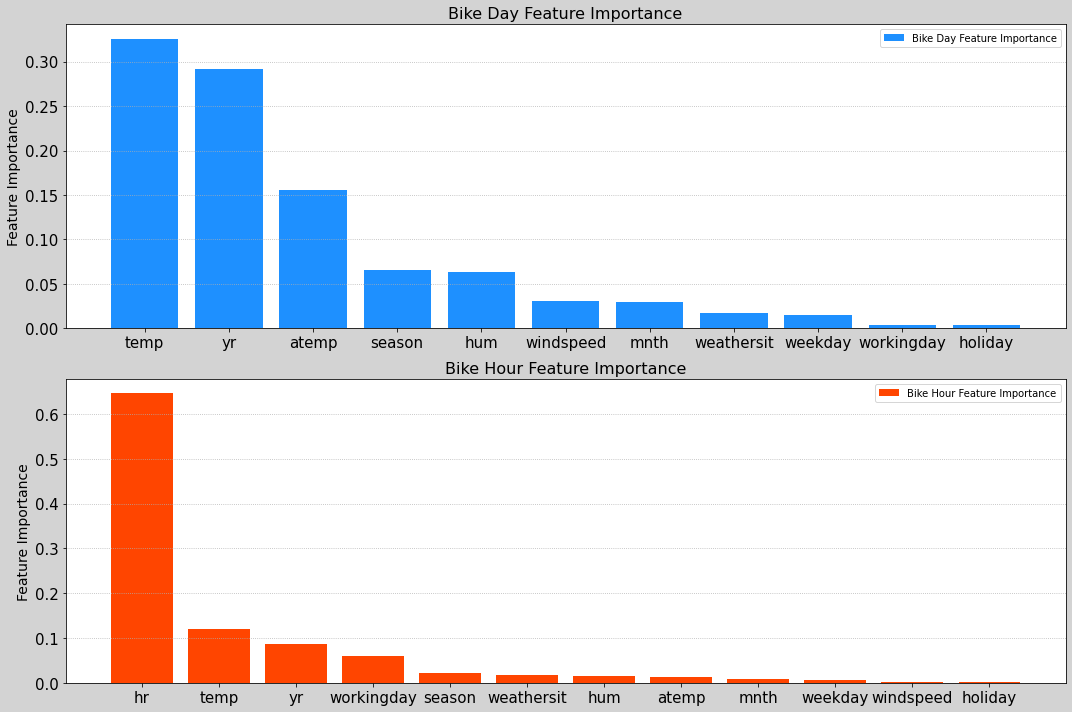

In [13]:
"""
    随机森林（sklearn实现共享单车使用量预测）
"""

import numpy as np
import pandas as pd
from sklearn import ensemble as se
from sklearn import utils as su
from sklearn import metrics as sm
from matplotlib import pyplot as plt

bick_csv = pd.read_csv("ml_data/bike_day.csv")
dataSet = bick_csv.loc[:, "season":"windspeed"]
d_headers = dataSet.columns.values
d_x = dataSet.values
d_y = bick_csv.loc[:, "cnt"].values
#打乱数据集,拆分训练集与训练集
d_x, d_y = su.shuffle(d_x, d_y, random_state=7)

data_size = int(len(d_x) * 0.9)
# print(data_size)
d_train_x, d_train_y, d_test_x, d_test_y = d_x[:data_size], d_y[:data_size], d_x[data_size:], d_y[data_size:]

#训练随机森林模型
model = se.RandomForestRegressor(max_depth=10, n_estimators=1000, min_samples_split=2)
model.fit(d_train_x, d_train_y)
d_fi = model.feature_importances_

d_pred_test_y = model.predict(d_test_x)
print("R2得分为:  {}".format(sm.r2_score(d_test_y, d_pred_test_y)))

bick_csv = pd.read_csv("ml_data/bike_hour.csv")
dataSet = bick_csv.loc[:, "season":"windspeed"]
h_headers = dataSet.columns.values
h_x = dataSet.values
h_y = bick_csv.loc[:, "cnt"].values
#打乱数据集,拆分训练集与训练集
h_x, h_y = su.shuffle(h_x, h_y, random_state=7)

data_size = int(len(h_x) * 0.9)
# print(data_size)
h_train_x, h_train_y, h_test_x, h_test_y = h_x[:data_size], h_y[:data_size], h_x[data_size:], h_y[data_size:]

#训练随机森林模型
model = se.RandomForestRegressor(max_depth=10, n_estimators=1000, min_samples_split=2)
model.fit(h_train_x, h_train_y)
h_fi = model.feature_importances_

h_pred_test_y = model.predict(h_test_x)
print("R2得分为:  {}".format(sm.r2_score(h_test_y, h_pred_test_y)))
plt.figure("Random Forest", facecolor="lightgray", figsize=(15, 10))
plt.subplot(211)
plt.title("Bike Day Feature Importance", fontsize=16)
plt.tick_params(labelsize=15)
plt.ylabel("Feature Importance", fontsize=14)
plt.grid(linestyle=":", axis="y")
d_sorted_index = d_fi.argsort()[::-1]
d_fi = d_fi[d_sorted_index]
d_headers = d_headers[d_sorted_index]
plt.bar(d_headers, d_fi, color="dodgerblue", label="Bike Day Feature Importance")
plt.legend()
plt.tight_layout()

plt.subplot(212)
plt.title("Bike Hour Feature Importance", fontsize=16)
plt.tick_params(labelsize=15)

plt.ylabel("Feature Importance", fontsize=14)

plt.grid(linestyle=":", axis="y")
h_sorted_index = h_fi.argsort()[::-1]
h_fi = h_fi[h_sorted_index]
h_headers = h_headers[h_sorted_index]
plt.bar(h_headers, h_fi, color="orangered", label="Bike Hour Feature Importance")
plt.legend()
plt.tight_layout()
plt.show()


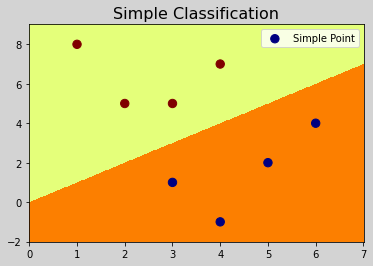

In [78]:
"""
    人工分类
            特征1           特征2              输出
             3               1                 0
             2               5                 1
             1               8                 1
             6               4                 0
             5               2                 0
             3               5                 1
             4               7                 1
             4               -1                0
            ...             ...               ...
             6               8                 1
             5               1                 0
"""
import numpy as np
from matplotlib import pyplot as plt

x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

#拿到图片范围
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
#进行拆分
n = 500
#np.meshgrid(x可取值范围,y可取值范围)
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min, x_max, n),
    np.linspace(y_min, y_max, n)
)

# numpy 判断函数
grid_z = np.piecewise(grid_x, [grid_x > grid_y, grid_x < grid_y], [1, 0])
plt.figure("Simple Classification", facecolor="lightgray")
plt.title("Simple Classification", fontsize=16)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap="Wistia")
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="jet", label="Simple Point", s=70)
plt.legend()
plt.show()





"""
    逻辑分类(基于模型的算法:sklearn实现)
        - 通过输入的样本数据，基于多元线型回归模型求出线性预测方程。
             y = w₀+w₁x₁+w₂x₂
            - 但通过线型回归方程返回的是连续值，不可以直接用于分类业务模型，所以急需一种方式使得把连续的预测值->离散的预测值。
              [-oo, +oo]->{0, 1}
                                           1
                - 逻辑函数(sigmoid)：y = ————————
                                        1 + e⁻ᕽ
            - 该逻辑函数当x>0，y>0.5；当x<0, y<0.5； 可以把样本数据经过线性预测模型求得的值带入逻辑函数的x，即将预测函数的输出看做输入
              被划分为1类的概率，择概率大的类别作为预测结果，可以根据函数值确定两个分类。这是线性函数非线性化的一种方式。
        - 逻辑回归相关API：
            import sklearn.linear_model as lm
            - model = lm.LogisticRegression(solver='liblinear', C=正则强度)      构建逻辑回归器
                - solver                逻辑函数中指数的函数关系（liblinear为线型函数关系）
                - C                     参数代表正则强度，为了防止过拟合。正则越大拟合效果越小。
            model.fit(训练输入集，训练输出集)
            result = model.predict(带预测输入集)
        - 多元分类
            - 通过多个二元分类器解决多元分类问题。
                特征1         特征2     ==>     所属类别        属于A概率       属于B概率     属于C概率
                  4            7       ==>        A             0.7           0.1          0.2
                 3.5           8       ==>        A             0.6           0.2          0.2
                 1.2          1.9      ==>        B             0.1           0.8          0.1
                 5.4          2.2      ==>        C             0.2           0.1          0.7
                - 若拿到一组新的样本，可以基于二元逻辑分类训练出一个模型判断属于A类别的概率。再使用同样的方法训练出两个模型分别判断属于
                  B、C类型的概率，最终选择概率最高的类别作为新样本的分类结果。
        - 逻辑回归的一般过程
            - 收集数据：采用任意方法收集数据。
            - 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
            - 分析数据：采用任意方法对数据进行分析。
            - 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
            - 测试算法：一旦训练步骤完成，分类将会很快。
            - 使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计
                      算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

        - 算法优缺点
            - 优点：计算代价不高，易于理解和实现。
            - 缺点：容易欠拟合，分类精度可能不高。
            - 适用数据类型：数值型和标称型数据。
"""


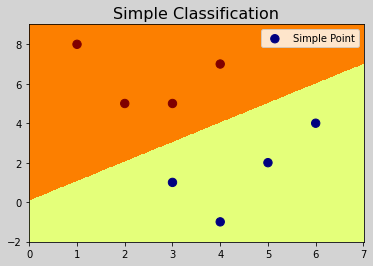

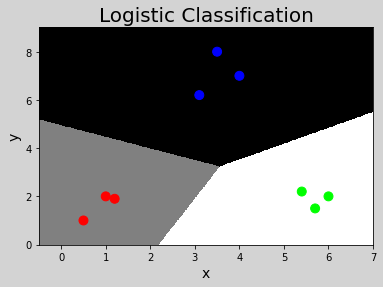

In [4]:
"""
    逻辑分类(sklearn实现)
        - 逻辑回归相关API：
            import sklearn.linear_model as lm
            - model = lm.LogisticRegression(solver='liblinear', C=正则强度)      构建逻辑回归器
                - solver                逻辑函数中指数的函数关系（liblinear为线型函数关系）
                - C                     参数代表正则强度，为了防止过拟合。正则越大拟合效果越小。
            model.fit(训练输入集，训练输出集)
            result = model.predict(带预测输入集)
"""
from sklearn import linear_model as lm
from sklearn import metrics as sm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#逻辑分类(二元分类)
x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

model = lm.LogisticRegression(solver="liblinear", C=1)
model.fit(x, y)

#拿到图片范围
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
#进行拆分
n = 500
#np.meshgrid(x可取值范围,y可取值范围)
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min, x_max, n),
    np.linspace(y_min, y_max, n)
)
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
pred_y = model.predict(samples)
# numpy 判断函数
grid_z = pred_y.reshape(grid_x.shape)

plt.figure("Simple Classification", facecolor="lightgray")
plt.title("Simple Classification", fontsize=16)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap="Wistia")
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="jet", label="Simple Point", s=70)
plt.legend()
plt.show()

#逻辑分类(多元分类)
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as mp

x = np.array([
    [4, 7],
    [3.5, 8],
    [3.1, 6.2],
    [0.5, 1],
    [1, 2],
    [1.2, 1.9],
    [6, 2],
    [5.7, 1.5],
    [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
# 逻辑分类器
model = lm.LogisticRegression(solver='liblinear', C=1000)
model.fit(x, y)
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
# print(grid_z)
grid_z = grid_z.reshape(grid_x.shape)

mp.figure('Logistic Classification', facecolor='lightgray')
mp.title('Logistic Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.show()



In [57]:
"""
    逻辑分类(手撕代码实现)
"""
import random
import numpy as np
import pandas as pd


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


dataSet = pd.read_csv("sklearn_data/LogiReg_data.txt").values
#切分数据集
datasize = int(len(dataSet) * 0.8)
train_x, train_y, test_x, test_y = dataSet[:datasize, :-1], dataSet[:datasize, -1], dataSet[datasize:, :-1], dataSet[
                                                                                                             datasize:,
                                                                                                             -1]






[[-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811873]
 [ 0.02188127]
 [ 0.02188127]
 [ 0.02188127]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [-0.97811873]
 [ 0.02188127]
 [-0.97811

"""
    朴素贝叶斯分类
        - 朴素贝叶斯分类是一种依据统计概率理论而实现的一种分类方式。观察这组数据：
             天气情况       穿衣风格        约女朋友        ==>         心情
            ---------     ---------      ---------      ----      ---------
             0（晴天）      0（休闲）       0（约了）       ==>        0（高兴）
             0             1（风骚）       1（没约）       ==>        0
             1（多云）      1              0              ==>       0
             0             2（破旧）       1              ==>       1（郁闷）
             2（下雨）      2              0              ==>       0
             ...            ...            ...           ==>         ...
             0             1              0              ==>         ？
            - 过上述训练样本如何预测：晴天、穿着休闲、没有约女朋友时的心情？可以整理相同特征值的样本，计算属于某类别的概率即可。
              但是如果在样本空间没有完全匹配的数据该如何预测？
                - 贝叶斯定理：
                    P(A, B) = P(A) * P(B|A) = P(B) * P(A|B)     (条件概率)
                              P(B|A) * P(A)
                    P(A|B) = ————————————————
                                   P(B)
                - 例如：
                    - 假设一个学校里有60%男生和40%女生.女生穿裤子的人数和穿裙子的人数相等,所有男生穿裤子.一个人在远处随机看到了一个穿裤子的
                      学生.那么这个学生是女生的概率是多少?
                            P(女) = 0.4
                            P(裤子|女) = 0.5
                            P(裤子) = 0.6 + 0.2 = 0.8
                            P(女|裤子) = P(裤子|女) * P(女) / P(裤子) = 0.5 * 0.4 / 0.8 = 0.25
                    - 根据贝叶斯定理，如何预测：晴天、穿着休闲、没有约女朋友时的心情？
                            P(晴天,休闲,没约,高兴)
                            = P(晴天|休闲,没约,高兴) * P(休闲,没约,高兴)
                            = P(晴天|休闲,没约,高兴) * P(休闲|没约,高兴) * P(没约,高兴)
                            = P(晴天|休闲,没约,高兴) * P(休闲|没约,高兴) * P(没约|高兴) * P(高兴)
                            （ 朴素：条件独立，特征值之间没有因果关系）
                            = P(晴天|高兴) * P(休闲|高兴) * P(没约|高兴) * P(高兴)
                    - 由此可得，统计总样本空间中晴天、穿着休闲、没有约女朋友时高兴的概率，与晴天、穿着休闲、没有约女朋友时不高兴的概率，
                      择其大者为最终结果。
        - 贝叶斯分类器相关API：
            - 高斯型分布朴素贝叶斯分类器
                model = nb.GaussianNB()
                model.fit(x, y)
                result = model.predict(samples)
            - 伯努利型分布朴素贝叶斯分类器
                nb.BernoulliNB()
                model.fit(x, y)
                result = model.predict(samples)
            - 补充朴素贝叶斯分类器(补充朴素贝叶斯分类器旨在纠正标准多项朴素贝叶斯分类器做出的“严重假设”。它特别适用于不平衡的数据集。)
                nb.ComplementNB()
                model.fit(x, y)
                result = model.predict(samples)
            - 分类特征的朴素贝叶斯分类器
                nb.CategoricalNB()
                 model.fit(x, y)
                result = model.predict(samples)
            - 多项式型朴素贝叶斯分类器
                nb.MultinomialNB()
                model.fit(x, y)
                result = model.predict(samples)
        - 数据集划分
            - 对于分类问题训练集和测试集的划分不应该用整个样本空间的特定百分比作为训练数据，而应该在其每一个类别的样本中抽取特定百分比作为训练
              数据。sklearn模块提供了数据集划分相关方法，可以方便的划分训练集与测试集数据，使用不同数据集训练或测试模型，达到提高分类可信度。
            - 数据集划分相关API：
               import sklearn.model_selection as ms
               ms.train_test_split(输入集, 输出集, test_size=测试集占比, random_state=随机种子)
                    ->训练输入, 测试输入, 训练输出, 测试输出
        - 交叉验证
            - 由于数据集的划分有不确定性，若随机划分的样本正好处于某类特殊样本，则得到的训练模型所预测的结果的可信度将受到质疑。所以需要进行多次
              交叉验证，把样本空间中的所有样本均分成n份，使用不同的训练集训练模型，对不同的测试集进行测试时输出指标得分。
            - sklearn提供了交叉验证相关API：
                import sklearn.model_selection as ms
                ms.cross_val_score(模型, 输入集, 输出集, cv=折叠数, scoring=交叉验证指标)->指标值数组
                - 交叉验证指标
                    - 精确度(accuracy)：分类正确的样本数/总样本数
                    - 查准率(precision_weighted)：针对每一个类别，预测正确的样本数比上预测出来的样本数
                    - 召回率(recall_weighted)：针对每一个类别，预测正确的样本数比上实际存在的样本数
                    - f1得分(f1_weighted)：2x查准率x召回率/(查准率+召回率)
                - 在交叉验证过程中，针对每一次交叉验证，计算所有类别的查准率、召回率或者f1得分，然后取各类别相应指标值的平均数，作为这一次交叉
                  验证的评估指标，然后再将所有交叉验证的评估指标以数组的形式返回调用者。

        - 混淆矩阵
            - 每一行和每一列分别对应样本输出中的每一个类别，行表示实际类别，列表示预测类别。
                         A类别             B类别             C类别
              A类别       5                0                 0
              B类别       0                6                 0
              C类别       0                0                 7
              上述矩阵即为理想的混淆矩阵。不理想的混淆矩阵如下：
                         A类别             B类别             C类别
              A类别        3                1                1
              B类别        0                4                2
              C类别        0                0                7
              查准率 = 主对角线上的值 / 该值所在列的和
              召回率 = 主对角线上的值 / 该值所在行的和
            - 获取模型分类结果的混淆矩阵的相关API：
               import sklearn.metrics as sm
               sm.confusion_matrix(实际输出, 预测输出)->混淆矩阵
        分类报告
            - sklearn.metrics提供了分类报告相关API，不仅可以得到混淆矩阵，还可以得到交叉验证查准率、召回率、f1得分的结果，
              可以方便的分析出哪些样本是异常样本。
            - 获取分类报告
              cr = sm.classification_report(实际输出, 预测输出)

"""

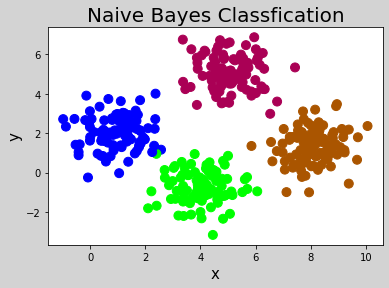

精确度: 0.9966666666666667
查准率: 0.996875
召回率: 0.9966666666666667
f1得分: 0.996662958843159
预测效果: 0.99
混淆矩阵:
 [[22  0  0  0]
 [ 0 27  1  0]
 [ 0  0 25  0]
 [ 0  0  0 25]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      0.96      0.98        28
         2.0       0.96      1.00      0.98        25
         3.0       1.00      1.00      1.00        25

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



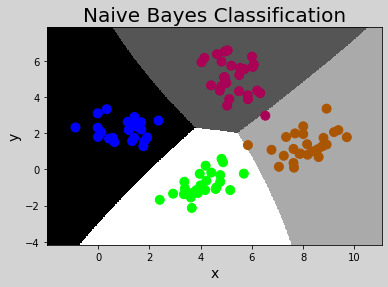

In [11]:
"""
    朴素贝叶斯(sklearn实现)
"""
from sklearn import naive_bayes as nb
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
from sklearn import metrics as sm

data = np.loadtxt("ml_data/multiple1.txt", unpack=False, dtype="U20", delimiter=",")
# print(data.shape)

x = data[:, :-1].astype("f8")
y = data[:, -1].astype("f8")
plt.figure("Naive Bayes Classfication", facecolor="lightgray")
plt.title("Naive Bayes Classfication", fontsize=20)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.tick_params(labelsize=10)
# plt.pcolormesh()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="brg", s=80)
plt.show()
#划分训练集和测试集
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=7)

#构造高斯贝叶斯模型
model = nb.GaussianNB()
#交叉验证
cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="accuracy")
print("精确度: {}".format(cvs.mean()))

cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="precision_weighted")
print("查准率: {}".format(cvs.mean()))

cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="recall_weighted")
print("召回率: {}".format(cvs.mean()))

cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="f1_weighted")
print("f1得分: {}".format(cvs.mean()))

model.fit(train_x, train_y)
#输出模型的预测效果
pred_test_y = model.predict(test_x)
print("预测效果: {}".format((pred_test_y == test_y).sum() / test_y.size))

#输出混淆矩阵
cm = sm.confusion_matrix(test_y, pred_test_y)
print("混淆矩阵:\n {}".format(cm))
# 获取分类报告
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
grid_z = grid_z.reshape(grid_x.shape)

plt.figure('Naive Bayes Classification', facecolor='lightgray')
plt.title('Naive Bayes Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()


In [ ]:
"""
    手写贝叶斯
"""


In [35]:
"""
    决策树分类
        - 决策树分类模型会找到与样本特征匹配的叶子节点然后以投票的方式进行分类。在样本文件中统计了小汽车的常见特征信息及小汽车的分类，使用这些
          数据基于决策树分类算法训练模型预测小汽车等级。
          汽车价格     维修费用    车门数量    载客数     后备箱     安全性     汽车级别
"""
#案例：基于决策树分类算法训练模型预测小汽车等级。
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms

#读取文本数据，对每一列进行标签编码
data = np.loadtxt('./ml_data/car.txt', delimiter=',', dtype='U10')

#整理样本空间，输入集与输出集
train_x, train_y = [], []
# 存储标签编码器
encoders = []
for index, row in enumerate(data.T):
    '''
        row 原数据集的列数据
    '''
    # 对数据集原字符串数据进行数值转化
    encoder = sp.LabelEncoder()
    if index < (len(data.T) - 1):
        # 添加到输入集
        train_x.append(encoder.fit_transform(row))

    else:
        # 添加到输出集
        train_y = encoder.fit_transform(row)
    encoders.append(encoder)

train_x = np.array(train_x).T
# print(train_x,train_y)
#训练随机森林分类器模型
model = se.RandomForestClassifier(max_depth=6, n_estimators=200, random_state=7)
#交叉验证
score = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="f1_weighted")
# print(score.mean())
model.fit(train_x, train_y)

#自定义测试数据，用已训练好的模型进行测试
data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']
]
data = np.array(data)
test_x, test_y = [], []
for index, row in enumerate(data.T):
    '''
        row 原数据集的列数据
    '''
    encoder = encoders[index]
    if index < (len(data.T) - 1):
        # 添加到输入集
        test_x.append(encoder.transform(row))
    else:
        # 添加到输出集
        test_y = encoder.transform(row)
test_x = np.array(test_x).T
pred_test_y = model.predict(test_x)
print(encoders[-1].inverse_transform(test_y))
print(encoders[-1].inverse_transform(pred_test_y))
# print((pred_test_y == test_y).sum()/float(test_y.size))



['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'acc' 'vgood']


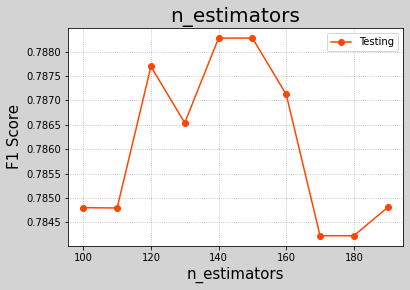

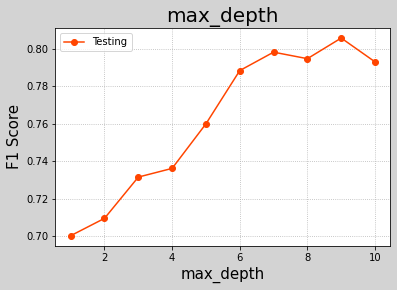

['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'vgood']


In [38]:
"""
    验证曲线
        - 验证曲线：模型性能 = f(超参数)
        - 验证曲线所需API：
            - train_scores, test_scores = ms.validation_curve(model,inputset,outputset,param_name,param_range,cv)
                model		                                    模型
                inputset		                                输入集
                outputset		                                输出集
                param_name		                                超参数名("n_estimators")
                param_range		                                超参数范围
                cv		                                        折叠数

        - train_scores的结构:
            超参数取值     第一次折叠       第二次折叠       第三次折叠       第四次折叠       第五次折叠
               50       0.91823444      0.91968162     0.92619392      0.91244573     0.91040462
               100      0.91968162      0.91823444     0.91244573      0.92619392     0.91244573
               ..................
            test_scores的结构与train_scores的结构相同。
"""
# 案例：在小汽车评级案例中使用验证曲线选择较优参数。
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
from matplotlib import pyplot as plt

#读取文本数据，对每一列进行标签编码
data = np.loadtxt('./ml_data/car.txt', delimiter=',', dtype='U10')

#整理样本空间，输入集与输出集
train_x, train_y = [], []
# 存储标签编码器
encoders = []
for index, row in enumerate(data.T):
    '''
        row 原数据集的列数据
    '''
    # 对数据集原字符串数据进行数值转化
    encoder = sp.LabelEncoder()
    if index < (len(data.T) - 1):
        # 添加到输入集
        train_x.append(encoder.fit_transform(row))

    else:
        # 添加到输出集
        train_y = encoder.fit_transform(row)
    encoders.append(encoder)

train_x = np.array(train_x).T
# print(train_x,train_y)
#训练随机森林分类器模型
model = se.RandomForestClassifier(max_depth=6, n_estimators=150, random_state=7)

#验证曲线，选择最优的超参数
n_estimators = np.arange(100,200,10)
max_depth = np.arange(1,11)
train_scores,test_scores = ms.validation_curve(model,train_x,train_y,param_name="n_estimators",param_range=n_estimators,cv=5)

train_means = train_scores.mean(axis=1)
test_means = test_scores.mean(axis=1)
plt.figure("n_estimators",facecolor="lightgray")
plt.title("n_estimators",fontsize=20)
plt.xlabel("n_estimators",fontsize=15)
plt.ylabel("F1 Score",fontsize=15)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
# plt.plot(n_estimators, train_means, 'o-', c='dodgerblue', label='Training')
plt.plot(n_estimators, test_means, 'o-', c='orangered', label='Testing')
plt.legend()
plt.show()
train_scores1,test_scores1 = ms.validation_curve(model,train_x,train_y,param_name="max_depth",param_range=max_depth,cv=5)
train_means1 = train_scores1.mean(axis=1)
test_means1 = test_scores1.mean(axis=1)
plt.figure("max_depth",facecolor="lightgray")
plt.title("max_depth",fontsize=20)
plt.xlabel("max_depth",fontsize=15)
plt.ylabel("F1 Score",fontsize=15)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
# plt.plot(n_estimators, train_means, 'o-', c='dodgerblue', label='Training')
plt.plot(max_depth, test_means1, 'o-', c='orangered', label='Testing')
plt.legend()
plt.show()

model = se.RandomForestClassifier(max_depth=9, n_estimators=150, random_state=7)

model.fit(train_x, train_y)

#自定义测试数据，用已训练好的模型进行测试
data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']
]
data = np.array(data)
test_x, test_y = [], []
for index, row in enumerate(data.T):
    '''
        row 原数据集的列数据
    '''
    encoder = encoders[index]
    if index < (len(data.T) - 1):
        # 添加到输入集
        test_x.append(encoder.transform(row))
    else:
        # 添加到输出集
        test_y = encoder.transform(row)
test_x = np.array(test_x).T
pred_test_y = model.predict(test_x)
print(encoders[-1].inverse_transform(test_y))
print(encoders[-1].inverse_transform(pred_test_y))

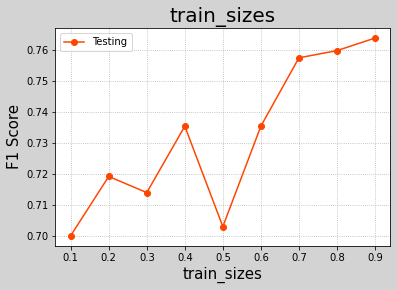

['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'acc' 'vgood']


In [37]:
"""
    学习曲线
        - 学习曲线：模型性能 = f(训练集大小)
        - 学习曲线所需API：
            - _, train_scores, test_scores = ms.learning_curve(model,inputset,outputset,train_sizes,cv)
                    model,		                                模型
                    inputset                                    输入集
                    outputset                                   输出集
                    train_sizes                                 训练集大小序列
                    cv                                          折叠数
            train_scores的结构:

"""
#案例：在小汽车评级案例中使用学习曲线选择训练集大小最优参数。
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
from matplotlib import pyplot as plt

#读取文本数据，对每一列进行标签编码
data = np.loadtxt('./ml_data/car.txt', delimiter=',', dtype='U10')

#整理样本空间，输入集与输出集
train_x, train_y = [], []
# 存储标签编码器
encoders = []
for index, row in enumerate(data.T):
    '''
        row 原数据集的列数据
    '''
    # 对数据集原字符串数据进行数值转化
    encoder = sp.LabelEncoder()
    if index < (len(data.T) - 1):
        # 添加到输入集
        train_x.append(encoder.fit_transform(row))

    else:
        # 添加到输出集
        train_y = encoder.fit_transform(row)
    encoders.append(encoder)

train_x = np.array(train_x).T

#训练随机森林分类器模型
model = se.RandomForestClassifier(max_depth=6, n_estimators=150, random_state=7)

#学习曲线(根据学习曲线划分训练集和测试集)
train_sizes = np.arange(0.1,1.0,0.1)
_,train_scores,test_scores = ms.learning_curve(model,train_x,train_y,train_sizes=train_sizes,cv=5)
test_means = test_scores.mean(axis=1)
plt.figure("Learning Curve",facecolor="lightgray")
plt.title("train_sizes",fontsize=20)
plt.xlabel("train_sizes",fontsize=15)
plt.ylabel("F1 Score",fontsize=15)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')

plt.plot(train_sizes, test_means, 'o-', c='orangered', label='Testing')
plt.legend()
plt.show()


model.fit(train_x, train_y)




In [ ]:
"""
    案例：预测工人工资收入。
        - 读取adult.txt，针对不同形式的特征选择不同类型的编码器，训练模型，预测工人工资收入。
"""


In [ ]:
"""
    支持向量机(SVM)
        - 支持向量机原理
            - 寻求最优分类边界
                - 正确：对大部分样本可以正确地划分类别。
                - 泛化：最大化支持向量间距。
                - 公平：与支持向量等距。
                - 简单：线性，直线或平面，分割超平面。
            - 基于核函数的升维变换
                通过名为核函数的特征变换，增加新的特征，使得低维度空间中的线性不可分问题变为高维度空间中的线性可分问题。
                - 线性核函数：linear，不通过核函数进行维度提升，仅在原始维度空间中寻求线性分类边界。
                    - 基于线性核函数的SVM分类相关API：
                        model = svm.SVC(kernel='linear')
                        model.fit(train_x, train_y)
               - 多项式核函数：poly，通过多项式函数增加原始样本特征的高次方幂
                            y = x₁ + x₂
                        y = x₁² + 2x₁x₂ + x₂²
                    y = x₁³ + 3x₁²x₂ + 3x₁x₂² + x₂³
                    - 基于线性核函数的支持向量机分类器API:
                        model = svm.SVC(kernel='poly', degree=3)
                        model.fit(train_x, train_y)
                - 径向基核函数:rbf，通过高斯分布函数增加原始样本特征的分布概率
                    - 基于径向基核函数的支持向量机分类器API
                        model = svm.SVC(kernel='rbf', C=600, gamma=0.01)
                            C                   正则强度
                            gamma               正态分布曲线的标准差
                        model.fit(train_x, train_y)

        - 样本类别均衡化
            - 通过类别权重的均衡化，使所占比例较小的样本权重较高，而所占比例较大的样本权重较低，以此平均化不同类别样本对分类模型的贡献，提高模型性能。
            - 样本类别均衡化相关API：
                model = svm.SVC(kernel='linear', class_weight='balanced')
                model.fit(train_x, train_y)
        - 置信概率
            - 根据样本与分类边界的距离远近，对其预测类别的可信程度进行量化，离边界越近的样本，置信概率越低，反之，离边界越远的样本，置信概率高。
            - 获取每个样本的置信概率相关API：

                model = svm.SVC(kernel='rbf', C=600, gamma=0.01, probability=True)
                    probability                在获取模型时，给出超参数probability=True
                预测结果 = model.predict(输入样本矩阵)
                (调用model.predict_proba(样本矩阵)可以获取每个样本的置信概率矩阵)
                置信概率矩阵 = model.predict_proba(输入样本矩阵)
            - 置信概率矩阵格式如下：
                       类别1  类别2
                 -----  -----  -----
                 样本1  0.8     0.2
                 样本2  0.9     0.1
                 样本3  0.5     0.5
        - 网格搜索
            - 获取一个最优超参数的方式可以绘制验证曲线，但是验证曲线只能每次获取一个最优超参数。如果多个超参数有很多排列组合的话，就可以使用
              网格搜索寻求最优超参数组合。
            - 针对超参数组合列表中的每一个超参数组合，实例化给定的模型，做cv次交叉验证，将其中平均f1得分最高的超参数组合作为最佳选择，实例化模型对象。
            - 网格搜索相关API：
                import sklearn.model_selection as ms
                model = ms.GridSearchCV(模型, 超参数组合列表, cv=折叠数)
                model.fit(输入集，输出集)
                - 获取网格搜索每个参数组合
                    model.cv_results_['params']
                - 获取网格搜索每个参数组合所对应的平均测试分值
                    model.cv_results_['mean_test_score']
                - 获取最好的参数
                    model.best_params_
                    model.best_score_
                    model.best_estimator_


"""

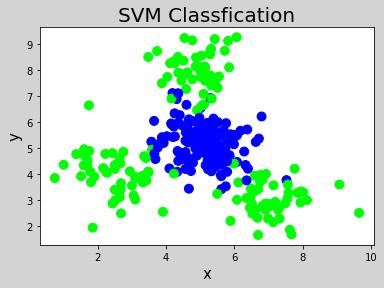

精确度: 0.9377777777777778
查准率: 0.9392225568312526
召回率: 0.9377777777777778
f1得分: 0.9377514012399883
预测效果: 0.96
混淆矩阵:
 [[38  2]
 [ 1 34]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        40
         1.0       0.94      0.97      0.96        35

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



d:\python\python37\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


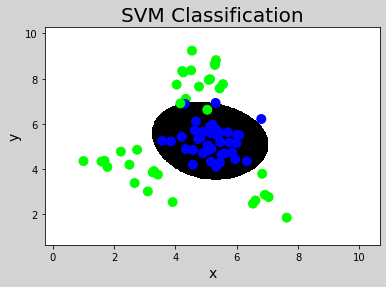

In [7]:
"""
    支持向量机(sklearn实现)
"""

import numpy as np
from sklearn import svm
from sklearn import metrics as sm
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
data = np.loadtxt("ml_data/multiple2.txt", unpack=False, dtype="U20", delimiter=",")
# print(data.shape)

x = data[:, :-1].astype("f8")
y = data[:, -1].astype("f8")

plt.figure("SVM Classfication", facecolor="lightgray")
plt.title("SVM Classfication", fontsize=20)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.tick_params(labelsize=10)
# plt.pcolormesh()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="brg", s=80)
plt.show()
#划分训练集和测试集
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=7)

#构造支持向量机模型
# model = svm.SVC(kernel="linear")
# model = svm.SVC(kernel="poly",degree=3)
model = svm.SVC(kernel="rbf",C=600,gamma=0.01)
#交叉验证
cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="accuracy")
print("精确度: {}".format(cvs.mean()))

cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="precision_weighted")
print("查准率: {}".format(cvs.mean()))

cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="recall_weighted")
print("召回率: {}".format(cvs.mean()))

cvs = ms.cross_val_score(model, train_x, train_y, cv=5, scoring="f1_weighted")
print("f1得分: {}".format(cvs.mean()))

model.fit(train_x, train_y)
#输出模型的预测效果
pred_test_y = model.predict(test_x)
print("预测效果: {}".format((pred_test_y == test_y).sum() / test_y.size))

#输出混淆矩阵
cm = sm.confusion_matrix(test_y, pred_test_y)
print("混淆矩阵:\n {}".format(cm))
# 获取分类报告
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
grid_z = grid_z.reshape(grid_x.shape)

plt.figure('SVM Classification', facecolor='lightgray')
plt.title('SVM Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()

d:\python\python37\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


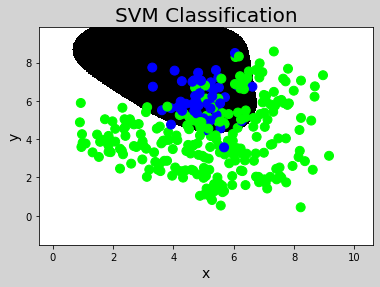

'\n    遇到样本类别不均衡问题可以使用上采样及下采样的方式解决\n    如：\n        类别1 200\n        类别2 1800\n        下采样 将类别2砍掉1600个样本到200个样本\n        上采样 将类别1通过其他手段升到1800个样本\n'

In [20]:
"""
    样本类别均衡化

"""
import numpy as np
from sklearn import svm
from sklearn import metrics as sm
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
data = np.loadtxt("./ml_data/imbalance.txt",delimiter=",",dtype="f8")
x = data[:,:-1]
y = data[:,-1]
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=7)
# 基于线性核函数的支持向量机分类器
# model = svm.SVC(kernel='linear', class_weight='balanced')
# model = svm.SVC(kernel='rbf', class_weight='balanced')
# model = svm.SVC(kernel='poly', class_weight='balanced')
model = svm.SVC(kernel='rbf', class_weight='balanced')

model.fit(train_x, train_y)


l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)



grid_z = grid_z.reshape(grid_x.shape)

plt.figure('SVM Classification', facecolor='lightgray')
plt.title('SVM Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()

"""
    遇到样本类别不均衡问题可以使用上采样及下采样的方式解决
    如：
        类别1 200
        类别2 1800
        下采样 将类别2砍掉1600个样本到200个样本
        上采样 将类别1通过其他手段升到1800个样本
"""


d:\python\python37\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


[[3.00000090e-14 1.00000000e+00]
 [3.00000090e-14 1.00000000e+00]
 [9.76665822e-01 2.33341777e-02]
 [5.51480773e-01 4.48519227e-01]
 [1.19599008e-02 9.88040099e-01]
 [2.23672908e-11 1.00000000e+00]
 [9.58171718e-01 4.18282820e-02]]


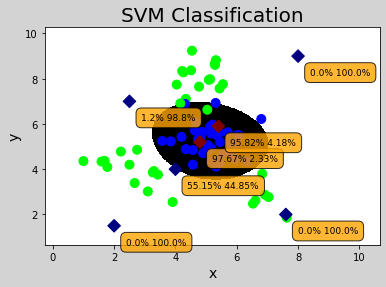

In [36]:
"""
    置信概率
"""

import numpy as np
from sklearn import svm
from sklearn import metrics as sm
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
data = np.loadtxt("ml_data/multiple2.txt", unpack=False, dtype="U20", delimiter=",")


x = data[:, :-1].astype("f8")
y = data[:, -1].astype("f8")

#划分训练集和测试集
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=7)

#构造支持向量机模型
model = svm.SVC(kernel="rbf",C=600,gamma=0.01,probability=True)



model.fit(train_x, train_y)

plt.figure('SVM Classification', facecolor='lightgray')
plt.title('SVM Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)

# 整理测试样本
prob_x = np.array([
    [2, 1.5],
    [8, 9],
    [4.8, 5.2],
    [4, 4],
    [2.5, 7],
    [7.6, 2],
    [5.4, 5.9]])

pred_prob_y = model.predict(prob_x)
probs = model.predict_proba(prob_x)
print(probs)
# 绘制每个测试样本，并给出标注
plt.scatter(prob_x[:,0], prob_x[:,1], c=pred_prob_y, cmap='jet_r', s=80, marker='D')
for i in range(len(probs)):
    plt.annotate(
        '{}% {}%'.format(
            round(probs[i, 0] * 100, 2),
            round(probs[i, 1] * 100, 2)),
        xy=(prob_x[i, 0], prob_x[i, 1]),
        xytext=(12, -12),
        textcoords='offset points',
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=9,
        bbox={'boxstyle': 'round,pad=0.6',
              'fc': 'orange', 'alpha': 0.8})
plt.show()

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9511111111111111
SVC(C=1, gamma=1, probability=True)
超参数{'C': 1, 'kernel': 'linear'}   得分0.6577777777777778
超参数{'C': 10, 'kernel': 'linear'}   得分0.6533333333333333
超参数{'C': 100, 'kernel': 'linear'}   得分0.6577777777777778
超参数{'C': 1000, 'kernel': 'linear'}   得分0.6622222222222222
超参数{'C': 1, 'degree': 2, 'kernel': 'poly'}   得分0.8399999999999999
超参数{'C': 1, 'degree': 3, 'kernel': 'poly'}   得分0.8711111111111112
超参数{'C': 1, 'gamma': 1, 'kernel': 'rbf'}   得分0.9511111111111111
超参数{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   得分0.9333333333333333
超参数{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}   得分0.7555555555555555
超参数{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}   得分0.5111111111111111
超参数{'C': 10, 'gamma': 1, 'kernel': 'rbf'}   得分0.9422222222222223
超参数{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}   得分0.9511111111111111
超参数{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}   得分0.9111111111111111
超参数{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}   得分0.6533333333333333
超参数{'C': 100, '

d:\python\python37\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


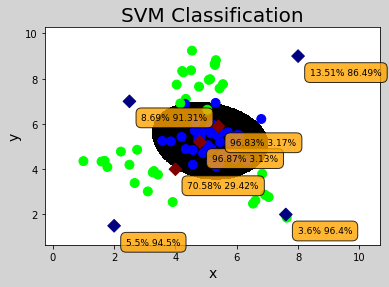

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9511111111111111
SVC(C=1, gamma=1, probability=True)
超参数: {'C': 1, 'kernel': 'linear'}   得分: 0.6577777777777778
超参数: {'C': 10, 'kernel': 'linear'}   得分: 0.6533333333333333
超参数: {'C': 100, 'kernel': 'linear'}   得分: 0.6577777777777778
超参数: {'C': 1000, 'kernel': 'linear'}   得分: 0.6622222222222222
超参数: {'C': 1, 'degree': 2, 'kernel': 'poly'}   得分: 0.8399999999999999
超参数: {'C': 1, 'degree': 3, 'kernel': 'poly'}   得分: 0.8711111111111112
超参数: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}   得分: 0.9511111111111111
超参数: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   得分: 0.9333333333333333
超参数: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}   得分: 0.7555555555555555
超参数: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}   得分: 0.5111111111111111
超参数: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}   得分: 0.9422222222222223
超参数: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}   得分: 0.9511111111111111
超参数: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}   得分: 0.9111111111111111
超参数: {'C': 10, 'gamma': 0.001, '

d:\python\python37\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


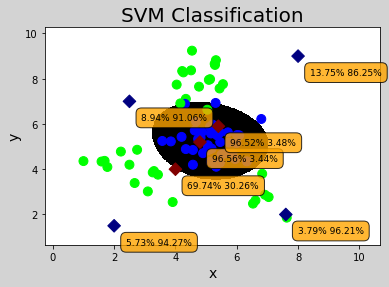

In [42]:
"""
    网格搜索
"""

from sklearn import model_selection as ms
import numpy as np
from sklearn import svm
from sklearn import metrics as sm
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
data = np.loadtxt("ml_data/multiple2.txt", unpack=False, dtype="U20", delimiter=",")


x = data[:, :-1].astype("f8")
y = data[:, -1].astype("f8")

#划分训练集和测试集
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=7)

#构造支持向量机模型
model = svm.SVC(probability=True)
#网格搜索确定最优超参数
params = [{'kernel':['linear'], 'C':[1, 10, 100, 1000]},
    {'kernel':['poly'], 'C':[1], 'degree':[2, 3]},
    {'kernel':['rbf'], 'C':[1,10,100,1000], 'gamma':[1, 0.1, 0.01, 0.001]}]
model = ms.GridSearchCV(model,params,cv=5)
model.fit(train_x, train_y)
print(model.best_params_)
print(model.best_score_)
print(model.best_estimator_)
#输出交叉验证结果
for p,s in zip(model.cv_results_["params"],model.cv_results_["mean_test_score"]):
    print("超参数: %s   得分: %s"%(p,s))

plt.figure('SVM Classification', facecolor='lightgray')
plt.title('SVM Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)

# 整理测试样本
prob_x = np.array([
    [2, 1.5],
    [8, 9],
    [4.8, 5.2],
    [4, 4],
    [2.5, 7],
    [7.6, 2],
    [5.4, 5.9]])

pred_prob_y = model.predict(prob_x)
probs = model.predict_proba(prob_x)
print(probs)
# 绘制每个测试样本，并给出标注
plt.scatter(prob_x[:,0], prob_x[:,1], c=pred_prob_y, cmap='jet_r', s=80, marker='D')
for i in range(len(probs)):
    plt.annotate(
        '{}% {}%'.format(
            round(probs[i, 0] * 100, 2),
            round(probs[i, 1] * 100, 2)),
        xy=(prob_x[i, 0], prob_x[i, 1]),
        xytext=(12, -12),
        textcoords='offset points',
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=9,
        bbox={'boxstyle': 'round,pad=0.6',
              'fc': 'orange', 'alpha': 0.8})
plt.show()



In [84]:
"""
    案列: 事件预测
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm
from sklearn import metrics as sm
#将数据集中字符串类型的数字进行转换
class DigitEncoder():
    def fit_transform(self,y):
        return y.astype(int)
    def transform(self,y):
        return y.astype(int)
    def inverse_transform(self,y):
        return y.astype(str)



# 读取数据,整理数据集


data = np.loadtxt('./ml_data/events.txt', delimiter=',', dtype='U10')
# data = []
# with open("./ml_data/events.txt","r") as f:
#     for line in f.readlines():
#         data.append(line[:-1].split(","))
# data = np.array(data)

data = np.delete(data,1,axis=1)

encoders = []
#针对每一列做编码，整理输入域输出集
x,y =[],[]
for col in range(data.shape[1]):
    col_values = data[:,col]

    if col_values[0].isdigit():
        encoder = DigitEncoder()
    else:
        encoder = sp.LabelEncoder()

    #对当前列进行编码
    col_encoded = encoder.fit_transform(col_values)


    if col < data.shape[1] - 1:
        x.append(col_encoded)
    else:
        y = col_encoded
    encoders.append(encoder)
x = np.array(x).T

y = np.array(y)
# print(x.shape,y.shape)
train_x,test_x,train_y,test_y = ms.train_test_split(x,y,test_size=0.25,random_state=7)


# 选择模型，训练模型
model = svm.SVC(kernel="rbf",class_weight="balanced")
model.fit(train_x,train_y)
pred_test_y = model.predict(test_x)
print(sm.classification_report(test_y,pred_test_y))
data = [['Tuesday', '13:30:00', '21', '23']]
data = np.array(data)
# print(data)
x = []

for col in range(data.shape[1]):

    col_values = data[:,col]
    encoder = encoders[col]

    col_encoded = encoder.transform(col_values)
    x.append(col_encoded)
x = np.array(x).T
# print(x)
pred_y = model.predict(x)
print(pred_y,encoders[-1].inverse_transform(pred_y))


              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.22      0.33      0.27         6
           2       0.69      1.00      0.81        11

    accuracy                           0.66        44
   macro avg       0.58      0.64      0.59        44
weighted avg       0.72      0.66      0.67        44

[1] ['eventB']


In [93]:
"""
    案例：交通流量预测(回归)
"""
"""
    案列: 事件预测
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm
from sklearn import metrics as sm
#将数据集中字符串类型的数字进行转换
class DigitEncoder():
    def fit_transform(self,y):
        return y.astype(int)
    def transform(self,y):
        return y.astype(int)
    def inverse_transform(self,y):
        return y.astype(str)



# 读取数据,整理数据集


data = np.loadtxt('./ml_data/traffic.txt', delimiter=',', dtype='U10')
# data = []
# with open("./ml_data/events.txt","r") as f:
#     for line in f.readlines():
#         data.append(line[:-1].split(","))
# data = np.array(data)


encoders = []
#针对每一列做编码，整理输入域输出集
x,y =[],[]
for col in range(data.shape[1]):
    col_values = data[:,col]

    if col_values[0].isdigit():
        encoder = DigitEncoder()
    else:
        encoder = sp.LabelEncoder()

    #对当前列进行编码
    col_encoded = encoder.fit_transform(col_values)


    if col < data.shape[1] - 1:
        x.append(col_encoded)
    else:
        y = col_encoded
    encoders.append(encoder)
x = np.array(x).T

y = np.array(y)
# print(x.shape,y.shape)
train_x,test_x,train_y,test_y = ms.train_test_split(x,y,test_size=0.25,random_state=7)


# 选择模型，训练模型
model = svm.SVR(kernel="rbf",C=10, epsilon=0.2)
model.fit(train_x,train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))
data = [['Tuesday', '13:35', 'San Franci', 'yes']]
data = np.array(data)
# print(data)
x = []

for col in range(data.shape[1]):

    col_values = data[:,col]
    encoder = encoders[col]

    col_encoded = encoder.transform(col_values)
    x.append(col_encoded)
x = np.array(x).T
# print(x)
pred_y = model.predict(x)
print(pred_y)

0.4655507466714439
[29.47835172]


"""
    聚类
        - 分类（class）与聚类（cluster）不同，分类是有监督学习模型，聚类属于无监督学习模型。聚类讲究使用一些算法把样本划分为n个群落。一般情况下，
          这种算法都需要计算欧氏距离。
        - 欧氏距离即欧几里得距离。
            P(x₁) - Q(x₂): (x₁ - x₂)² = ((x₁ - x₂)²) ** 0.5
            P(x₁,y₁) - Q(x₂,y₂): ((x₁ - x₂)² + (y₁ - y₂)²) ** 0.5
            P(x₁,y₁,z₁) - Q(x₂,y₂,z₂): ((x₁ - x₂)² + (y₁ - y₂)² + (z₁ - z₂)²) ** 0.5
            用两个样本对应特征值之差的平方和之平方根，即欧氏距离，来表示这两个样本的相似性。
        - K均值算法
            - 第一步：随机选择k个样本作为k个聚类的中心，计算每个样本到各个聚类中心的欧氏距离，将该样本分配到与之距离最近的聚类中心所在的类别中。
            - 第二步：根据第一步所得到的聚类划分，分别计算每个聚类的几何中心，将几何中心作为新的聚类中心，重复第一步，直到计算所得几何中心与聚类中
                     心重合或接近重合为止。
            - 注意：
                1. 聚类数k必须事先已知。借助某些评估指标，优选最好的聚类数。
                2. 聚类中心的初始选择会影响到最终聚类划分的结果。初始中心尽量选择距离较远的样本。
            - K均值算法相关API：
                import sklearn.cluster as sc

                model = sc.KMeans(n_clusters=4)
                        n_clusters          聚类数
                model.fit(x)   # 不断调整聚类中心，知道最终聚类中心稳定则聚类完成
                labels = model.labels_  # 获取每个样本的聚类标签
                centers = model.cluster_centers_   # 获取训练结果的聚类中心
            - 图像量化
                - KMeans聚类算法可以应用于图像量化领域。通过KMeans算法可以把一张图像所包含的颜色值进行聚类划分，求每一类别的平均值后再重新生成新的
                  图像。可以达到图像降维的目的。这个过程称为图像量化。图像量化可以更好的保留图像的轮廓，降低机器识别图像轮廓的难度。
            - 均值漂移算法
                - 首先假定样本空间中的每个聚类均服从某种已知的概率分布规则，然后用不同的概率密度函数拟合样本中的统计直方图，不断移动密度函数的中心
                  (均值)的位置，直到获得最佳拟合效果为止。这些概率密度函数的峰值点就是聚类的中心，再根据每个样本距离各个中心的距离，选择最近聚类中
                  心所属的类别作为该样本的类别。
                - 均值漂移算法的特点：
                    1. 聚类数不必事先已知，算法会自动识别出统计直方图的中心数量。
                    2. 聚类中心不依据于最初假定，聚类划分的结果相对稳定。
                    3. 样本空间应该服从某种概率分布规则，否则算法的准确性会大打折扣。
                - 均值漂移算法相关API：
                    bw = sc.estimate_bandwidth(x, n_samples=len(x), quantile=0.1) # 量化带宽，决定每次调整概率密度函数的步进量
                        n_samples          样本数量
                        quantile           量化宽度（直方图一条的宽度）
                    model = sc.MeanShift(bandwidth=bw, bin_seeding=True) # 均值漂移聚类器
                    model.fit(x)
            - 凝聚层次算法
                - 首先假定每个样本都是一个独立的聚类，如果统计出来的聚类数大于期望的聚类数，则从每个样本出发寻找离自己最近的另一个样本，与之聚集，
                  形成更大的聚类，同时令总聚类数减少，不断重复以上过程，直到统计出来的聚类数达到期望值为止。
                - 凝聚层次算法的特点：
                    1. 聚类数k必须事先已知。借助某些评估指标，优选最好的聚类数。
                    2. 没有聚类中心的概念，因此只能在训练集中划分聚类，但不能对训练集以外的未知样本确定其聚类归属。
                    3. 在确定被凝聚的样本时，除了以距离作为条件以外，还可以根据连续性来确定被聚集的样本。
                - 凝聚层次算法相关API：
                    model = sc.AgglomerativeClustering(n_clusters=4)   # 凝聚层次聚类器
                    pred_y = model.fit_predict(x)
            - 轮廓系数
                - 好的聚类：内密外疏，同一个聚类内部的样本要足够密集，不同聚类之间样本要足够疏远。
                - 轮廓系数计算规则：针对样本空间中的一个特定样本，计算它与所在聚类其它样本的平均距离a，以及该样本与距离最近的另一个聚类中所有样本的
                  平均距离b，该样本的轮廓系数为(b-a)/max(a, b)，将整个样本空间中所有样本的轮廓系数取算数平均值，作为聚类划分的性能指标s。
                - 轮廓系数的区间为：[-1, 1]。 -1代表分类效果差，1代表分类效果好。0代表聚类重叠，没有很好的划分聚类。
                - 轮廓系数相关API：
                    import sklearn.metrics as sm
                    v = sm.silhouette_score(输入集, 输出集, sample_size=样本数, metric=距离算法)
                            v                                    平均轮廓系数
                            metric                               距离算法：使用欧几里得距离(euclidean)
            - DBSCAN算法
                - 从样本空间中任意选择一个样本，以事先给定的半径做圆，凡被该圆圈中的样本都视为与该样本处于相同的聚类，以这些被圈中的样本为圆心继续
                  做圆，重复以上过程，不断扩大被圈中样本的规模，直到再也没有新的样本加入为止，至此即得到一个聚类。于剩余样本中，重复以上过程，直到
                  耗尽样本空间中的所有样本为止。
                - DBSCAN算法的特点：
                    1. 事先给定的半径会影响最后的聚类效果，可以借助轮廓系数选择较优的方案。
                    2. 根据聚类的形成过程，把样本细分为以下三类：
                       外周样本：被其它样本聚集到某个聚类中，但无法再引入新样本的样本。
                       孤立样本：聚类中的样本数低于所设定的下限，则不称其为聚类，反之称其为孤立样本。
                       核心样本：除了外周样本和孤立样本以外的样本。
            - DBSCAN聚类算法相关API：
                model = sc.DBSCAN(eps=epsilon, min_samples=5)
                     eps               半径
                     min_samples       聚类样本数的下限，若低于该数值，则称为孤立样本
                model.fit(x)


"""

d:\python\python37\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


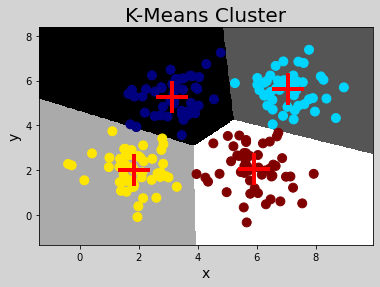

In [11]:
"""
    K均值算法（KNN）
"""
import numpy as np
from sklearn import cluster as sc
from matplotlib import pyplot as plt
x = np.loadtxt("./ml_data/multiple3.txt",delimiter=",")
model = sc.KMeans(n_clusters=4)
model.fit(x)
pred_y = model.labels_
centers = model.cluster_centers_

l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
grid_z = grid_z.reshape(grid_x.shape)
# pred_y = model.predict(x)
plt.figure("K-Means Cluster",facecolor="lightgray")
plt.title("K-Means Cluster",fontsize=20)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
# 分类边界线
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(x[:,0],x[:,1],c=pred_y,cmap="jet",s=80)
# 聚类中心
plt.scatter(centers[:,0],centers[:,1],marker="+",c="red",s=1000,linewidth=4)
plt.show()

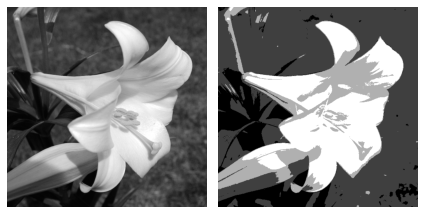

In [41]:
"""
    图像量化
"""
import numpy as np
import scipy.misc as sm
import sklearn.cluster as sc
from matplotlib import pyplot as plt
import cv2 as cv
original = cv.imread("./ml_data/lily.jpg",0)
plt.subplot(121)
plt.axis("off")
plt.imshow(original,cmap="gray")
plt.tight_layout()

# 基于K-Means算法实现图像量化
model = sc.KMeans(n_clusters=4)
#拿到n行一列的数据
x = original.reshape(-1,1)
model.fit(x)
y = model.labels_
centers = model.cluster_centers_
# print(y)
# print(centers)
# print(centers[y])
# 将y作为索引取centers中的数据
new_image = centers[y].reshape(original.shape)
plt.subplot(122)
plt.imshow(new_image,cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

d:\python\python37\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


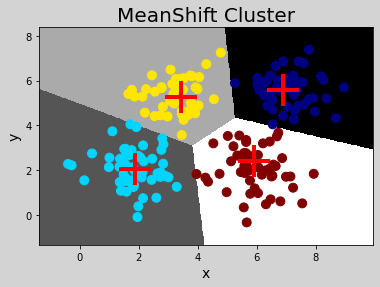

In [48]:
"""
    均值漂移
"""
import numpy as np
from sklearn import cluster as sc
from matplotlib import pyplot as plt
x = np.loadtxt("./ml_data/multiple3.txt",delimiter=",")
# model = sc.KMeans(n_clusters=4)
bw = sc.estimate_bandwidth(x,n_samples=len(x),quantile=0.1)
model = sc.MeanShift(bandwidth=bw,bin_seeding=True)
model.fit(x)
pred_y = model.labels_
centers = model.cluster_centers_

l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
grid_z = grid_z.reshape(grid_x.shape)
# pred_y = model.predict(x)
plt.figure("MeanShift Cluster",facecolor="lightgray")
plt.title("MeanShift Cluster",fontsize=20)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
# 划分类边界线
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(x[:,0],x[:,1],c=pred_y,cmap="jet",s=80)
# 划聚类中心`6
plt.scatter(centers[:,0],centers[:,1],marker="+",c="red",s=1000,linewidth=4)
plt.show()


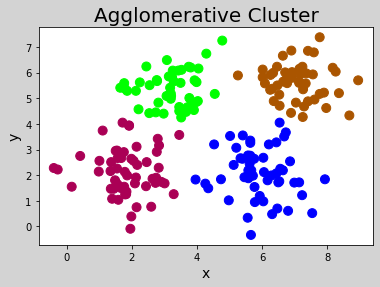

In [49]:
"""
    凝聚层次
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
x = np.loadtxt('./ml_data/multiple3.txt', delimiter=',')
# 凝聚层次聚类器
model = sc.AgglomerativeClustering(n_clusters=4)
pred_y = model.fit_predict(x)
mp.figure('Agglomerative Cluster', facecolor='lightgray')
mp.title('Agglomerative Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80)
mp.show()


0.5773232071896658


d:\python\python37\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


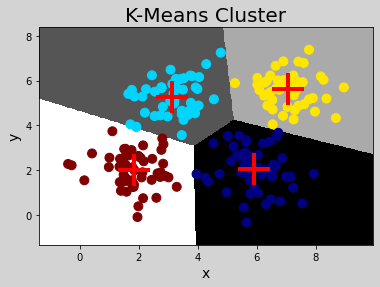

In [51]:
"""
    轮廓系数(聚类评估指标)
"""
import numpy as np
from sklearn import cluster as sc
from matplotlib import pyplot as plt
from sklearn import metrics as sm
x = np.loadtxt("./ml_data/multiple3.txt",delimiter=",")
model = sc.KMeans(n_clusters=4)
model.fit(x)
pred_y = model.labels_
centers = model.cluster_centers_
# 输出轮廓系数
score = sm.silhouette_score(x,pred_y,sample_size=len(x),metric="euclidean")
print(score)
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
n = 500
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
grid_z = grid_z.reshape(grid_x.shape)
# pred_y = model.predict(x)
plt.figure("K-Means Cluster",facecolor="lightgray")
plt.title("K-Means Cluster",fontsize=20)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
# 分类边界线
plt.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
plt.scatter(x[:,0],x[:,1],c=pred_y,cmap="jet",s=80)
# 聚类中心
plt.scatter(centers[:,0],centers[:,1],marker="+",c="red",s=1000,linewidth=4)
plt.show()


0.7999999999999999 0.6366395861050828 DBSCAN(eps=0.7999999999999999)


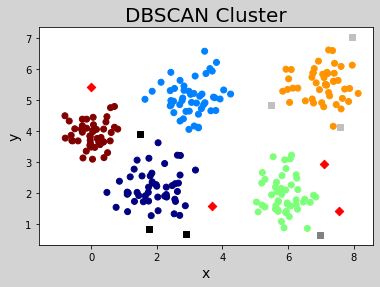

In [67]:
"""
    DBSCAN算法
"""
from matplotlib import pyplot as plt
import numpy as np
import sklearn.cluster as sc
from sklearn import metrics as sm
x = np.loadtxt("./ml_data/perf.txt",delimiter=",")
#优选半径参数
eps , scores,models = np.linspace(0.3,1.2,10),[],[]
for r in eps:
    model = sc.DBSCAN(eps=r,min_samples=5)
    model.fit(x)
    labels = model.labels_
    score = sm.silhouette_score(x,labels,sample_size=len(x),metric="euclidean")
    scores.append(score)
    models.append(model)
# 获取最优得分
best_index = np.array(scores).argmax()
best_model = models[best_index]
best_score = scores[best_index]
best_r = eps[best_index]
print(best_r,best_score,best_model)
plt.figure("DBSCAN Cluster",facecolor="lightgray")
plt.title("DBSCAN Cluster",fontsize=20)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
# 获取核心样本、孤立样本、外周样本
core_mask = np.zeros(len(x),dtype="bool")
core_mask[best_model.core_sample_indices_] = True

labels = best_model.labels_
# 绘制核心样本
plt.scatter(x[core_mask][:,0],x[core_mask][:,1],c=labels[core_mask],cmap="jet")
# 绘制孤立样本
offset_mask = labels == -1
plt.scatter(x[offset_mask][:,0],x[offset_mask][:,1],color="red",marker="D")
# 绘制外周样本
p_mask = ~(core_mask | offset_mask)
plt.scatter(x[p_mask][:,0],x[p_mask][:,1],c=labels[p_mask],marker="s",cmap="gray")

plt.show()

"""
    推荐引擎
       - 推荐引擎意在把最需要的推荐给用户。在不同的机器学习场景中通常需要分析相似样本。而统计相似样本的方式可以基于欧氏距离分数，也可基于皮氏距离分数。
       - 欧氏距离分数
                              1
            欧氏距离分数 = ————————————
                          1 + 欧氏距离
       - 计算所得欧氏距离分数区间处于：[0, 1]，越趋于0样本间的欧氏距离越远，样本越不相似；越趋于1，样本间的欧氏距离越近，越相似。构建样本之间的欧氏
         距离得分矩阵：
            |     a       b       c      d      ..|
            | a   1       0.2     0.3    0.4    ..|          | b   0.2
            | c   0.3     1       x      x      ..|
            | d   0.4     x       1      x      ..|
            |..   ..      x       x      1      ..|

       - 皮尔逊相关系数
            A = [1,2,3,1,2]
            B = [3,4,5,3,4]
            m = np.corrcoef(A, B)
            皮尔逊相关系数 = 协方差 / 标准差之积
            相关系数处于[-1, 1]区间。越靠近-1代表两组样本反相关，越靠近1代表两组样本正相关。


"""


In [11]:
"""
    案例:电影推荐
"""
import json
import numpy as np
with open("./ml_data/ratings.json","r") as f:
    ratings = json.loads(f.read())

users = list(ratings.keys())
scmat = []
for user1 in users:
    scow = []
    for user2 in users:
        # 计算user1与user2的欧氏距离或皮尔逊系数得分
        movies = set()  #整理两人都看过的电影
        for movie in ratings[user1]:
            if movie in ratings[user2]:
                movies.add(movie)
        if len(movies) == 0:  # 两人没有共同电影
            score = 0
        else:
            A,B =[],[] #存储两个人对相同电影的打分
            for movie in movies:
                A.append(ratings[user1][movie])
                B.append(ratings[user2][movie])
            A,B = np.array(A),np.array(B)
             #计算欧氏距离
            # score = 1/(1 + np.sqrt(((A - B)**2).sum()))
            #皮尔逊相关系数
            score = np.corrcoef(A,B)[0,1]
        scow.append(score)
    scmat.append(scow)
# 得分矩阵
scmat = np.array(scmat)
# print(np.round(scmat,2))

# 按照相似度从高到低排列每个用户的相似用户，实现召回算法
users = np.array(users)
for i,user in enumerate(users):
    # print(scmat[i].argsort(),scmat[i])
    sorted_indices = scmat[i].argsort()[::-1]
    # 剔除自己的
    sorted_indices = sorted_indices[sorted_indices != i]
    # 相似用户
    similar_users = users[sorted_indices]
    similar_scores = scmat[i,sorted_indices]
    # print(user,similar_users,similar_scores)
    # 找到所有正相关的用户

    positive_mask = similar_scores > 0

    similar_users = similar_users[positive_mask]
    # 整理字典的数据结构，存储召回电影列表
    reco_movies = {}
    for i,sim_user in enumerate(similar_users):
        for movie , score in ratings[sim_user].items():

            if movie not in ratings[user].keys():
                 # 存入推荐字典
                if movie not in reco_movies:
                    reco_movies[movie] = [score]
                else:
                    reco_movies[movie].append(score)
    # print(user)
    # print(reco_movies)

    # 排序，评分平均值最高的电影优先推荐
    movie_list = sorted(reco_movies.items(),key=lambda x:np.mean(x[1]),reverse=True)
    print(user,movie_list)

John Carson []
Michelle Peterson []
William Reynolds [('Serendipity', [2.5, 2.5, 3.5, 3.5]), ('Anger Management', [3.0, 3.0, 1.5])]
Jillian Hobart [('Inception', [2.5, 3.0, 2.5, 3.0, 3.0])]
Melissa Jones []
Alex Roberts [('Anger Management', [1.5, 3.0, 2.0, 3.0])]
Michael Henry [('Jerry Maguire', [3.0, 3.0, 4.5, 3.0, 3.0]), ('Inception', [2.5, 3.0, 3.0, 3.0]), ('Anger Management', [3.0, 2.0, 3.0, 1.5])]


"""
    自然语言处理（NLP）
        - 自然语言处理（NLP）
            - Siri的工作流程：1. 听  2.懂  3.思考  4.组织语言   5.回答
                1. 语音识别
                2. 自然语言处理 - 语义分析
                3. 逻辑分析 - 结合业务场景与上下文
                4. 自然语言处理 - 分析结果生成自然语言文本
                5. 语音合成
            - 自然语言处理的常用处理过程：
                - 先针对训练文本进行分词处理（词干提取、原型提取），统计词频，通过词频-逆文档频率算法获得该词对样本语义的贡献，根据每个词的贡献力度，
                  构建有监督分类学习模型。把测试样本交给模型处理，得到测试样本的语义类别。
                - 自然语言工具包 - NLTK
            - 文本分词
                import nltk.tokenize as tk

                sent_list = tk.sent_tokenize(text)         # 把样本按句子进行拆分  sent_list:句子列表
                word_list = tk.word_tokenize(text)         # 把样本按单词进行拆分  word_list:单词列表
                punctTokenizer = tk.WordPunctTokenizer()   #  把样本按单词进行拆分 punctTokenizer：分词器对象
                word_list = punctTokenizer.tokenize(text)
            - 词干提取
                文本样本中的单词的词性与时态对于语义分析并无太大影响，所以需要对单词进行词干提取。
                - 词干提取相关API：
                    import nltk.stem.porter as pt
                    import nltk.stem.lancaster as lc
                    import nltk.stem.snowball as sb
                    stemmer = pt.PorterStemmer() # 波特词干提取器，偏宽松
                    stemmer = lc.LancasterStemmer() # 朗卡斯特词干提取器，偏严格
                    stemmer = sb.SnowballStemmer('english') # 思诺博词干提取器，偏中庸
                    r = stemmer.stem('playing') # 提取单词playing的词干
            - 词性还原
                - 与词干提取的作用类似，词性还原更利于人工二次处理。因为有些词干并非正确的单词，人工阅读更麻烦。
                  词性还原可以把名词复数形式恢复为单数形式，动词分词形式恢复为原型形式。
                - 词性还原相关API：
                    import nltk.stem as ns
                    # 获取词性还原器对象
                    lemmatizer = ns.WordNetLemmatizer()
                    # 把单词word按照名词进行还原
                    n_lemma = lemmatizer.lemmatize(word, pos='n')
                    # 把单词word按照动词进行还原
                    v_lemma = lemmatizer.lemmatize(word, pos='v')
            - 词袋模型
                - 一句话的语义很大程度取决于某个单词出现的次数，所以可以把句子中所有可能出现的单词作为特征名，每一个句子为一个样本，单词在句子中出
                  现的次数为特征值构建数学模型，称为词袋模型。
                The brown dog is running. The black dog is in the black room. Running in the room is forbidden.
                1 The brown dog is running
                2 The black dog is in the black room
                3 Running in the room is forbidden
                    the	   brown   dog	 is	  running	black	in	 room	forbidden
                     1	    1	    1	 1	     1	      0	     0	  0	        0
                     2	    0	    1	 1	     0	      2	     1	  1	        0
                     1	    0       0	 1	     1	      0	     1	  1	        1
                - 词袋模型化相关API：
                    import sklearn.feature_extraction.text as ft
                    # 构建词袋模型对象
                    cv = ft.CountVectorizer()
                    # 训练模型，把句子中所有可能出现的单词作为特征名，每一个句子为一个样本，单词在句子中出现的次数为特征值。
                    bow = cv.fit_transform(sentences).toarray()
                    print(bow)
                    # 获取所有特征名
                    words = cv.get_feature_names()
            - 词频（TF）
              单词在句子中出现的次数除以句子的总词数称为词频。即一个单词在一个句子中出现的频率。词频相比单词的出现次数可以更加客观的评估单词对一句
              话的语义的贡献度。词频越高，对语义的贡献度越大。对词袋矩阵归一化即可得到词频。
            - 文档频率（DF）
                - 含有某个单词的文档样本数/总文档样本数
            - 逆文档频率（IDF）
                - 总样本数/含有某个单词的样本数
            - 词频-逆文档频率(TF-IDF)
                - 词频矩阵中的每一个元素乘以相应单词的逆文档频率，其值越大说明该词对样本语义的贡献越大，根据每个词的贡献力度，构建学习模型。
                - 获取词频逆文档频率（TF-IDF）矩阵相关API：
                    # 获取词袋模型
                    cv = ft.CountVectorizer()
                    bow = cv.fit_transform(sentences).toarray()
                    # 获取TF-IDF模型训练器
                    tt = ft.TfidfTransformer()
                    tfidf = tt.fit_transform(bow).toarray()
            - 文本分类(主题识别)
                - 使用给定的文本数据集进行主题识别训练，自定义测试集测试模型准确性。
            - 性别识别
                - 使用nltk提供的分类器对语料库中英文男名与女名文本进行性别划分训练，最终进行性别验证。
                    import nltk.corpus as nc
                    import nltk.classify as cf
                    # 读取语料库中names文件夹里的male.txt文件，并且进行分词
                    male_names = nc.names.words('male.txt')
                    '''
                    train_data的格式不再是样本矩阵，nltk要求的数据格式如下：
                    [ ({'age': 15, 'score1': 95, 'score2': 95}, 'good'),
                      ({'age': 15, 'score1': 45, 'score2': 55}, 'bad') ]
                    '''
                    # 基于朴素贝叶斯分类器训练测试数据
                    model = cf.NaiveBayesClassifier.train(train_data)
                    # 使用测试数据计算分类器精确度得分（测试数据格式与训练数据一致）
                    ac = cf.accuracy(model, test_data)
                    # 对具体的某个样本进行类别划分
                    feature = {'age': 15, 'score1': 95, 'score2': 95}
                    gender = model.classify(feature)
        - 自然语言处理（NLP）
            - nltk分类器
                - nltk提供了朴素贝叶斯分类器方便的处理自然语言相关的分类问题，并且可以自动处理词袋，完成IFIDF矩阵的整理，完成模型训练，
                  最终实现类别预测。使用方法如下：
                    import nltk.classify as cf
                    import nltk.classify.util as cu
                    '''
                    train_data的格式不再是样本矩阵，nltk要求的数据格式如下：
                    [ ({'age': 15, 'score1': 95, 'score2': 95}, 'good'),
                      ({'age': 15, 'score1': 45, 'score2': 55}, 'bad') ]
                    '''
                    # 基于朴素贝叶斯分类器训练测试数据
                    model = cf.NaiveBayesClassifier.train(train_data)
                    ac = cu.accuracy(model, test_data)
                    print(ac)
            - 情感分析
                - 分析语料库中movie_reviews文档，通过正面及负面评价进行自然语言训练，实现情感分析。

            - 主题抽取
                - 经过分词、单词清洗、词干提取后，基于TF-IDF算法可以抽取一段文本中的核心主题词汇，从而判断出当前文本的主题。属于无监督学习。
                   gensim模块提供了主题抽取的常用工具
                - 主题抽取相关API：
                    import gensim.models.ldamodel as gm
                    import gensim.corpora as gc

                    # 把lines_tokens中出现的单词都存入gc提供的词典对象，对每一个单词做编码。
                    line_tokens = ['hello', 'world', ...]
                    dic = gc.Dictionary(line_tokens)
                    # 通过字典构建词袋
                    bow = dic.doc2bow(line_tokens)
                    # 构建LDA模型
                    # bow: 词袋
                    # num_topics: 分类数
                    # id2word: 词典
                    # passes: 每个主题保留的最大主题词个数
                    model = gm.LdaModel(bow, num_topics=n_topics, id2word=dic, passes=25)
                    # 输出每个类别中对类别贡献最大的4个主题词
                    topics = model.print_topics(num_topics=n_topics, num_words=4)
        - 语音识别
            - 声音的本质是震动，震动的本质是位移关于时间的函数，波形文件(.wav)中记录了不同采样时刻的位移。
            - 通过傅里叶变换，可以将时间域的声音函数分解为一系列不同频率的正弦函数的叠加，通过频率谱线的特殊分布，建立音频内容和文本的对应关系，
              以此作为模型训练的基础。
            - 语音识别
                - 梅尔频率倒谱系数(MFCC)通过与声音内容密切相关的13个特殊频率所对应的能量分布，可以使用梅尔频率倒谱系数矩阵作为语音识别的特征。
                  基于隐形马尔科夫模型进行模式识别，找到测试样本最匹配的声音模型，从而识别语音内容。
                - 梅尔频率倒谱系数相关API：
                    import scipy.io.wavfile as wf
                    import python_speech_features as sf
                    sample_rate, sigs = wf.read('../data/freq.wav')
                    mfcc = sf.mfcc(sigs, sample_rate)
                - 隐马尔科夫模型相关API：
                    import hmmlearn.hmm as hl
                    # n_components: 用几个高斯分布函数拟合样本数据
                    # covariance_type: 相关矩阵的辅对角线进行相关性比较
                    # n_iter: 最大迭代上限
                    model = hl.GaussianHMM(n_components=4, covariance_type='diag', n_iter=1000)
                    model.fit(mfccs)
                    # 使用模型匹配测试mfcc矩阵的分值
                    score = model.score(test_mfccs)
                - 声音合成
                    - 根据需求获取某个声音的模型频域数据，根据业务需要可以修改模型数据，逆向生成时域数据，完成声音的合成。
"""